# <center>PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS</center>
## <center>Pós-graduação Lato Sensu em Ciência de Dados e Big Data</center>
### <center>Trabalho de Conclusão de Curso</center>
#### <center>MODELO DE REGRESSÃO LINEAR PARA PREVER A NOTA DE UM CANDIDATO DO ENEM BASEADO EM SEU PERFIL SOCIOECONÔMICO</center>

### <center>Aluno: Leonardo Almeida de Araújo</center>
###



In [ ]:
# Pacotes usados neste notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import locale
locale.setlocale(locale.LC_ALL, '')

# configurações gerais
pd.set_option('display.max_columns', None) #para mostrar todas colunas
pd.set_option('display.max_rows', 100) #para mostrar 100 linhas

# 1. **Dataset**
---

##### **Dataset ENEM**: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem
##### **Dataset IDD**: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/idd

Os microdados do Enem e do IDD são o menor nível de desagregação de dados recolhidos por meio do exame. Eles atendem a demanda por informações específicas ao disponibilizar as provas, os gabaritos, as informações sobre os itens, as notas e o questionário respondido pelos inscritos no Enem.

O arquivo principal (MICRODADOS_PRONTOS_ENEM_IDD) foi pré processados com os datasets (MICRODADOS_ENEM e MICRODADOS_IDD) e contém os questionários sócioeconomicos respondidos pelos participantes, juntando em um único arquivo as informações disponibilizadas sobre a realização das provas, a caracterização do participante e da escola que ele declarou ter frequentado, e as notas das provas objetivas e da redação.

In [ ]:
# Importando o Dataset
df = pd.read_csv('./MICRODADOS_PRONTOS_ENEM_IDD.zip', compression='zip' , sep=';', encoding="latin_1")

## 1. 1. **Informações básicas**

In [ ]:
df.head()

,NU_INSCRICAO,NU_ANO,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,Sorocaba,35,SP,36.0,M,1,3,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,Feira de Santana,29,BA,23.0,M,1,1,1,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,Fortaleza,23,CE,39.0,F,1,3,1,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,Palmas,17,TO,25.0,F,1,1,1,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1,1,1,483.8,503.6,537.3,392.0,1,1.0,120.0,120.0,120.0,100.0,0.0,460.0,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,Contagem,31,MG,22.0,F,1,1,1,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1,1,1,513.6,575.5,570.7,677.0,0,1.0,160.0,120.0,180.0,200.0,200.0,860.0,E,E,C,C,3,G,A,C,D,B,A,B,B,B,A,B,A,A,B,A,A,C,B,B,B


In [ ]:
df.shape

(5095270, 68)

A seguir a descrição dos atributos

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Data columns (total 68 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   NU_INSCRICAO                 int64  
 1   NU_ANO                       int64  
 2   NO_MUNICIPIO_RESIDENCIA      object 
 3   CO_UF_RESIDENCIA             int64  
 4   SG_UF_RESIDENCIA             object 
 5   NU_IDADE                     float64
 6   TP_SEXO                      object 
 7   TP_ESTADO_CIVIL              int64  
 8   TP_COR_RACA                  int64  
 9   TP_NACIONALIDADE             int64  
 10  TP_ST_CONCLUSAO              int64  
 11  TP_ANO_CONCLUIU              int64  
 12  TP_ESCOLA                    int64  
 13  TP_ENSINO                    float64
 14  IN_TREINEIRO                 int64  
 15  CO_ESCOLA                    float64
 16  CO_MUNICIPIO_ESC             float64
 17  NO_MUNICIPIO_ESC             object 
 18  CO_UF_ESC                    float64
 19  

In [ ]:
# Verificando a primeira observação
df.iloc[1,:]

NU_INSCRICAO                       190001421546
NU_ANO                                     2019
NO_MUNICIPIO_RESIDENCIA        Feira de Santana
CO_UF_RESIDENCIA                             29
SG_UF_RESIDENCIA                             BA
NU_IDADE                                     23
TP_SEXO                                       M
TP_ESTADO_CIVIL                               1
TP_COR_RACA                                   1
TP_NACIONALIDADE                              1
TP_ST_CONCLUSAO                               1
TP_ANO_CONCLUIU                               5
TP_ESCOLA                                     1
TP_ENSINO                                     1
IN_TREINEIRO                                  0
CO_ESCOLA                                   NaN
CO_MUNICIPIO_ESC                            NaN
NO_MUNICIPIO_ESC                            NaN
CO_UF_ESC                                   NaN
SG_UF_ESC                                   NaN
TP_DEPENDENCIA_ADM_ESC                  

## 1. 2. **Atributos**

### 1. 2. 1. **Dados do participante**
Informações referentes ao participante que se inscreveu para realizar a prova do Enem 2019.

#### 1. 2. 1. 1. **NU_INSCRICAO**
Número de inscrição do participante. Referente ao Enem 2019, trata-se de uma máscara e não o seu número de inscrição original no Enem. O mesmo NU_INSCRICAO para anos diferentes não identifica o mesmo participante no exame, não permite o acesso aos dados cadastrais como nome, endereço, RG etc, nem identifica o mesmo participante em microdados de pesquisas diferentes.

In [ ]:
# Número de inscrições únicas
len(df['NU_INSCRICAO'].unique())

5095270

In [ ]:
# Verificando se existem registros duplicados de inscrições
df.duplicated(subset=['NU_INSCRICAO']).any()

False

In [ ]:
# Verificando se existem registros faltantes
df['NU_INSCRICAO'].isnull().any()

False

#### 1. 2. 1. 2. **NU_ANO**
Ano do Enem, 2019 para os dados analisados.

In [ ]:
# Verificando anos disponíveis na base de dados
df['NU_ANO'].unique()

array([2019])

#### 1. 2. 1. 3. **CO_MUNICIPIO_RESIDENCIA** (Removido da base)
Código do município de residência. 
  * 1º dígito: região
  * 1º e 2º dígitos: UF
  * 3º-6º dígitos: Município
  * 7º dígito: dígito verificador

#### 1. 2. 1. 4. **NO_MUNICIPIO_RESIDENCIA**
Nome do município de residência.

In [ ]:
# Número de municípios de residência com nomes distintos
len(df['NO_MUNICIPIO_RESIDENCIA'].unique())

5299

In [ ]:
# Verificando se existem registros faltantes
df['NO_MUNICIPIO_RESIDENCIA'].isnull().any()

False

#### 1. 2. 1. 5. **CO_UF_RESIDENCIA**
Código da Unidade da Federação de residência.

In [ ]:
# Número de estados de residência
len(df['CO_UF_RESIDENCIA'].unique())

27

In [ ]:
# Verificando se existem registros faltantes
df['CO_UF_RESIDENCIA'].isnull().any()

False

#### 1. 2. 1. 6. **SG_UF_RESIDENCIA**
Sigla da Unidade da Federação de residência.

In [ ]:
# Siglas estados de residência
df['SG_UF_RESIDENCIA'].unique()

array(['SP', 'BA', 'CE', 'TO', 'MG', 'MT', 'RN', 'PR', 'PE', 'MA', 'DF',
       'AP', 'RS', 'SC', 'PA', 'PB', 'AM', 'RJ', 'GO', 'PI', 'SE', 'MS',
       'RO', 'ES', 'AL', 'AC', 'RR'], dtype=object)

In [ ]:
# Distribuição de candidatos por estado
sample_df = df.groupby(["SG_UF_RESIDENCIA"])\
.agg(percentage=("SG_UF_RESIDENCIA" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df

,SG_UF_RESIDENCIA,percentage
0,AC,0.750284
1,AL,1.799846
2,AM,2.317581
3,AP,0.827042
4,BA,7.813031
5,CE,5.806758
6,DF,1.851757
7,ES,2.010394
8,GO,3.339313
9,MA,4.311312


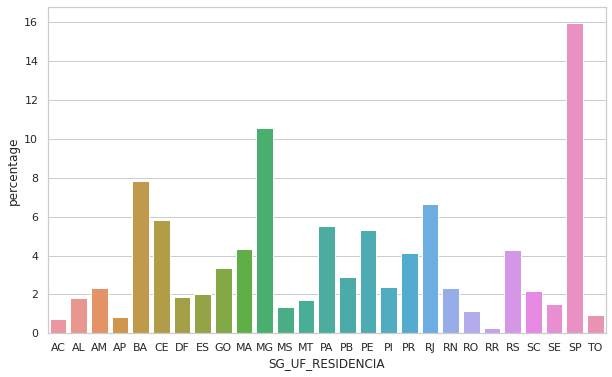

In [ ]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.barplot(data=sample_df, x='SG_UF_RESIDENCIA', y='percentage')

#### 1. 2. 1. 7. **NU_IDADE**
Idade do inscrito em 31/12/2019. Idades inferiores a 10 anos e superiores a 100 anos estão com o campo vazio na base.

In [ ]:
# Número de idades distintas dos participantes
len(df['NU_IDADE'].unique())

83

In [ ]:
# Distribuição de candidatos por idade
sample_df = df.groupby(["NU_IDADE"])\
.agg(percentage=("NU_IDADE" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df['NU_IDADE'] = sample_df['NU_IDADE'].astype(int)

sample_df

,NU_IDADE,percentage
0,10,0.000118
1,11,0.000177
2,12,0.000903
3,13,0.005221
4,14,0.103372
5,15,1.541902
6,16,6.210491
7,17,16.629432
8,18,16.960783
9,19,11.327541


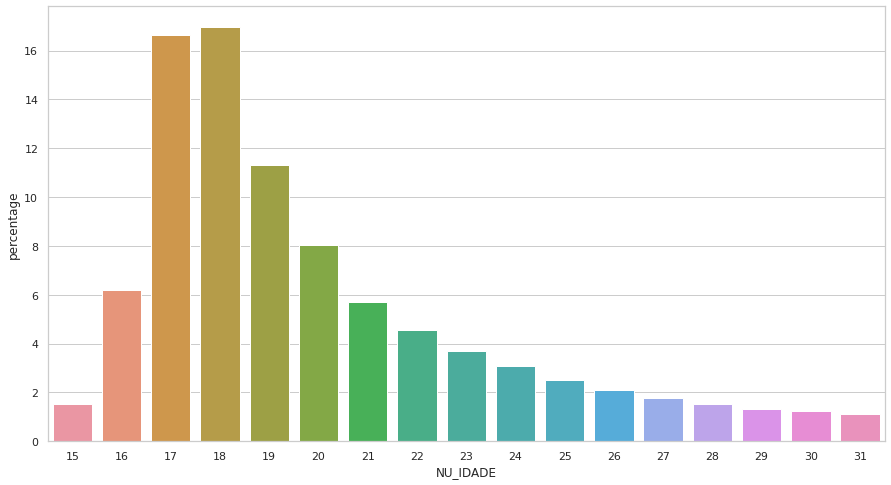

In [ ]:
# Distribuição de candidatos por idade, onde a idade representa ao menos 1% dos candidatos
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.barplot(x=sample_df.loc[sample_df['percentage'] >= 1 , 'NU_IDADE'], y=sample_df['percentage'])

#### 1. 2. 1. 8. **TP_SEXO**
Sexo do participante.
  * M: Masculino
  * F: Feminino

In [ ]:
# Distribuição de candidatos por sexo
sample_df = df.groupby(["TP_SEXO"])\
.agg(percentage=("TP_SEXO" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df

,TP_SEXO,percentage
0,F,59.502676
1,M,40.497324


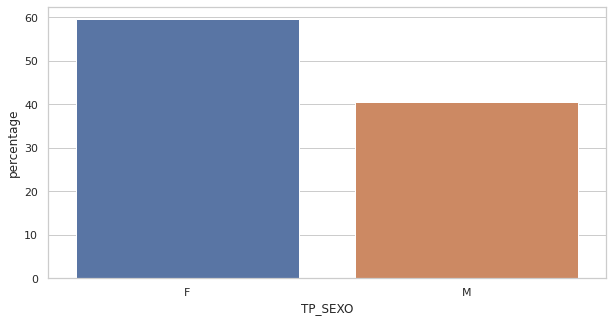

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.barplot(data=sample_df, x='TP_SEXO', y='percentage')

#### 1. 2. 1. 9. **TP_ESTADO_CIVIL**
Estado civil do participante.
  * 0: Não informado
  * 1: Solteiro(a)
  * 2: Casado(a)/Mora com companheiro(a)
  * 3: Divorciado(a)/Desquitado(a)/Separado(a)
  * 4: Viúvo(a)

In [ ]:
# Distribuição de candidatos por estado civil
sample_df = df.groupby(["TP_ESTADO_CIVIL"])\
.agg(percentage=("TP_ESTADO_CIVIL" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df

,TP_ESTADO_CIVIL,percentage
0,0,4.058666
1,1,86.324866
2,2,7.769068
3,3,1.725012
4,4,0.122388


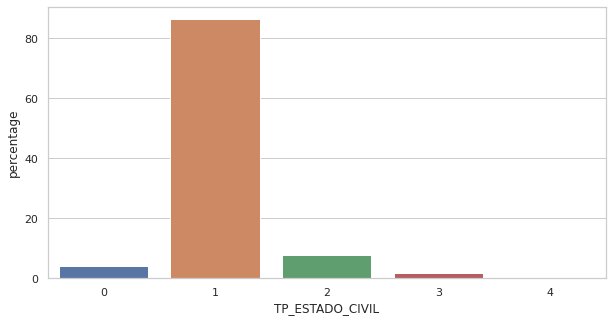

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.barplot(data=sample_df, x='TP_ESTADO_CIVIL', y='percentage')

#### 1. 2. 1. 10. **TP_COR_RACA**
Cor/raça do participante.
  * 0: Não declarado
  * 1: Branca
  * 2: Preta
  * 3: Parda
  * 4: Amarela
  * 5: Indígena

In [ ]:
# Distribuição de candidatos por raça
sample_df = df.groupby(["TP_COR_RACA"])\
.agg(percentage=("TP_COR_RACA" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df

,TP_COR_RACA,percentage
0,0,2.025428
1,1,35.950578
2,2,12.723742
3,3,46.397208
4,4,2.279801
5,5,0.623245


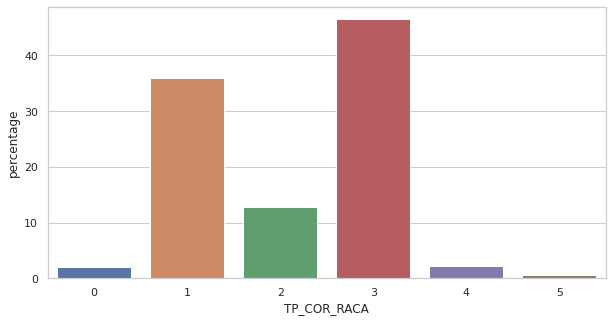

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.barplot(data=sample_df, x='TP_COR_RACA', y='percentage')

#### 1. 2. 1. 11. **TP_NACIONALIDADE**
Nacionalidade do participante.
  * 0: Não informado
  * 1: Brasileiro(a)
  * 2: Brasileiro(a) Naturalizado(a)
  * 3: Estrangeiro(a)
  * 4: Brasileiro(a) Nato(a), nascido(a) no exterior

In [ ]:
# Distribuição de candidatos por nacionalidade
sample_df = df.groupby(["TP_NACIONALIDADE"])\
.agg(percentage=("TP_NACIONALIDADE" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df

,TP_NACIONALIDADE,percentage
0,0,0.132456
1,1,97.149337
2,2,2.440145
3,3,0.116481
4,4,0.161581


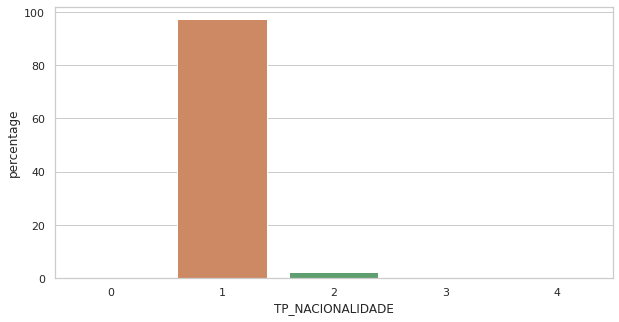

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.barplot(data=sample_df, x='TP_NACIONALIDADE', y='percentage')

#### 1. 2. 1. 12. **CO_MUNICIPIO_NASCIMENTO** (Removido da base)
Código do município de nascimento.
  * 1º dígito: região
  * 1º e 2º dígitos: UF
  * 3º-6º dígitos: Município
  * 7º dígito: dígito verificador

#### 1. 2. 1. 13. **NO_MUNICIPIO_NASCIMENTO** (Removido da base)
Nome do município de nasicmento.

#### 1. 2. 1. 14. **CO_UF_NASCIMENTO** (Removido da base)
Código da Unidade da Federação de nascimento.

#### 1. 2. 1. 15. **SG_UF_NASCIMENTO** (Removido da base)
Sigla da Unidade da Federação de nascimento.

#### 1. 2. 1. 16. **TP_ST_CONCLUSAO**
Situação de conclusão do Ensino Médio.
  * 1: Já concluiu o Ensino Médio
  * 2: Cursando e concluirá o Ensino Médio em 2019
  * 3: Cursando e concluirá o Ensino Médio após 2019
  * 4: Não concluíu e não está cursando o Ensino Médio

In [ ]:
# Distribuição de candidatos por situação de conclusão do EM
sample_df = df.groupby(["TP_ST_CONCLUSAO"])\
.agg(percentage=("TP_ST_CONCLUSAO" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df

,TP_ST_CONCLUSAO,percentage
0,1,58.739203
1,2,28.769722
2,3,12.102754
3,4,0.388321


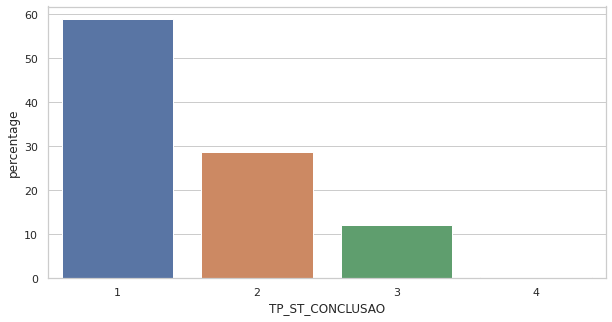

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.barplot(data=sample_df, x='TP_ST_CONCLUSAO', y='percentage')

#### 1. 2. 1. 17. **TP_ANO_CONCLUIU**
Ano de conclusão do Ensino Médio.
  * 0: Não informado
  * 1: 2018
  * 2: 2017
  * 3: 2016
  * 4: 2015
  * 5: 2014
  * 6: 2013
  * 7: 2012
  * 8: 2011
  * 9: 2010
  * 10: 2009
  * 11: 2008
  * 12: 2007
  * 13: Antes de 2007

In [ ]:
# Distribuição de candidatos por ano de conclusão do EM
sample_df = df.groupby(["TP_ANO_CONCLUIU"])\
.agg(percentage=("TP_ANO_CONCLUIU" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df

,TP_ANO_CONCLUIU,percentage
0,0,43.243871
1,1,12.972031
2,2,8.779201
3,3,6.029651
4,4,4.570121
5,5,3.589349
6,6,2.841792
7,7,2.429194
8,8,1.904021
9,9,1.736532


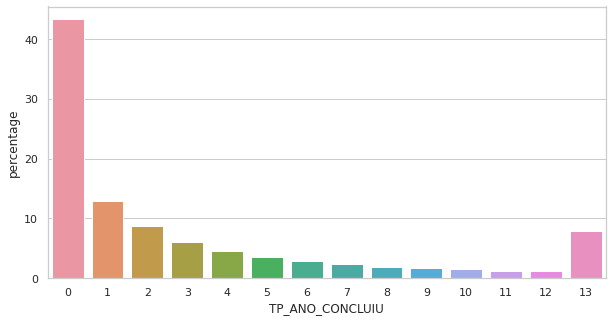

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.barplot(data=sample_df, x='TP_ANO_CONCLUIU', y='percentage')

#### 1. 2. 1. 18. **TP_ESCOLA**
Tipo de escola do Ensino Médio.
  * 1: Não respondeu
  * 2: Pública
  * 3: Privada
  * 4: Exterior

In [ ]:
# Distribuição de candidatos por tipo de escola do EM
sample_df = df.groupby(["TP_ESCOLA"])\
.agg(percentage=("TP_ESCOLA" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df

,TP_ESCOLA,percentage
0,1,71.230298
1,2,24.478821
2,3,4.290882


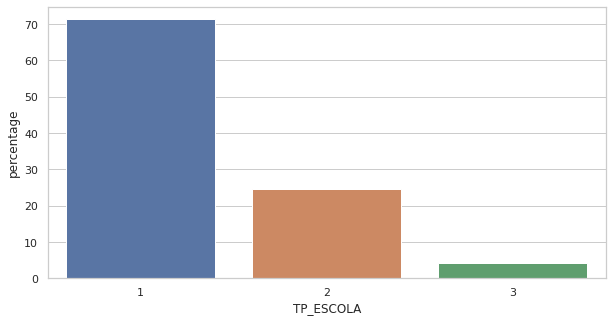

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.barplot(data=sample_df, x='TP_ESCOLA', y='percentage')

#### 1. 2. 1. 19. **TP_ENSINO**
Tipo de instituição que concluiu ou concluirá o Ensino Médio.
  * 1: Ensino regular
  * 2: Educação especial - Modalidade substitutiva
  * 3: Educação de Jovens e Adultos

In [ ]:
# Distribuição de candidatos por tipo de ensino
sample_df = df.groupby(["TP_ENSINO"])\
.agg(percentage=("TP_ENSINO" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df

,TP_ENSINO,percentage
0,1.0,99.520568
1,2.0,0.479432


#### 1. 2. 1. 20. **IN_TREINEIRO**
Indica se o  inscrito fez a prova com intuito de apenas treinar seus conhecimentos.
  * 0: Não
  * 1: Sim

In [ ]:
# Distribuição de candidatos por treineiro
sample_df = df.groupby(["IN_TREINEIRO"])\
.agg(percentage=("IN_TREINEIRO" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df

,IN_TREINEIRO,percentage
0,0,87.897246
1,1,12.102754


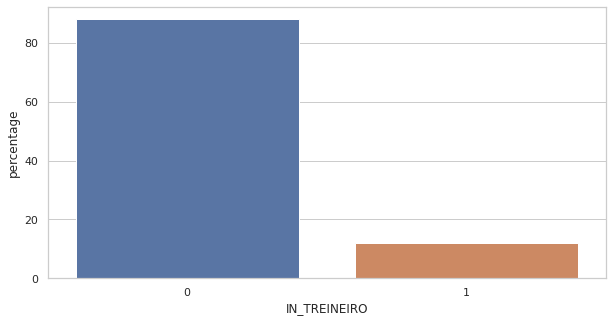

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.barplot(data=sample_df, x='IN_TREINEIRO', y='percentage')

### 1. 2. 2. **Dados da escola**

#### 1. 2. 2. 1. **CO_ESCOLA**
Código da Escola.

In [ ]:
# Número de escolas
len(df['CO_ESCOLA'].unique())

30249

In [ ]:
# Verificando se existem registros faltantes
df['CO_ESCOLA'].isnull().any()

True

In [ ]:
# Escolas com a maior quantidade de candidatos
sample_df = df.groupby(["CO_ESCOLA"])\
.agg(count=("CO_ESCOLA" , "count"))\
.reset_index()

sample_df.sort_values('count', ascending=False).head()

,CO_ESCOLA,count
214,11040793.0,685
4969,23164808.0,648
4578,23064684.0,627
4482,23036010.0,622
24469,41132122.0,610


Text(0.5, 0, 'Quantidade de alunos na escola')

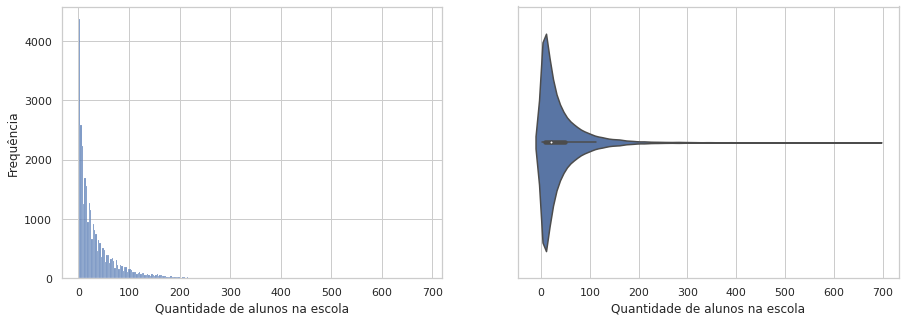

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax1 = sns.histplot(data=sample_df, x='count', ax=axes[0])
ax1.set_xlabel('Quantidade de alunos na escola')
ax1.set_ylabel('Frequência')
ax2 = sns.violinplot(data=sample_df, x='count', ax=axes[1])
ax2.set_xlabel('Quantidade de alunos na escola')

#### 1. 2. 2. 2. **CO_MUNICIPIO_ESC**
Código do municipio da escola.
  * 1º dígito: região
  * 1º e 2º dígitos: UF
  * 3º-6º dígitos: Município
  * 7º dígito: dígito verificador

In [ ]:
# Número de municípios das escolas
len(df['CO_MUNICIPIO_ESC'].unique())

5545

In [ ]:
# Verificando se existem registros faltantes
df['CO_MUNICIPIO_ESC'].isnull().any()

True

In [ ]:
# Municípios com a maior quantidade de candidatos
sample_df = df.groupby(["CO_MUNICIPIO_ESC"])\
.agg(count=("CO_MUNICIPIO_ESC" , "count"))\
.reset_index()

sample_df.sort_values('count', ascending=False).head(5)

,CO_MUNICIPIO_ESC,count
3818,3550308.0,52736
946,2304400.0,29738
3234,3304557.0,27441
5543,5300108.0,21075
111,1302603.0,16141


Text(0.5, 0, 'Quantidade de alunos no município')

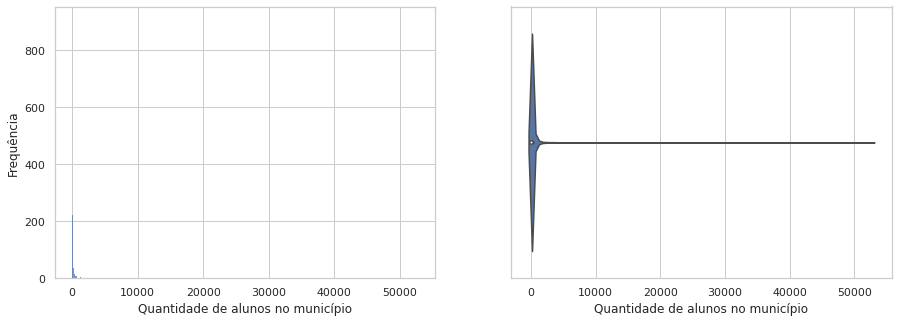

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax1 = sns.histplot(data=sample_df, x='count', ax=axes[0])
ax1.set_xlabel('Quantidade de alunos no município')
ax1.set_ylabel('Frequência')
ax2 = sns.violinplot(data=sample_df, x='count', ax=axes[1])
ax2.set_xlabel('Quantidade de alunos no município')

#### 1. 2. 2. 3. **NO_MUNICIPIO_ESC**
Nome do município da escola.

In [ ]:
# Número de escolas
len(df['NO_MUNICIPIO_ESC'].unique())

5278

In [ ]:
# Verificando se existem registros faltantes
df['NO_MUNICIPIO_ESC'].isnull().any()

True

#### 1. 2. 2. 4. **CO_UF_ESC**
Código da Unidade da Federação da escola.

In [ ]:
# UFs das escolas
df['CO_UF_ESC'].unique()

array([nan, 31., 41., 43., 35., 29., 25., 13., 53., 23., 22., 15., 33.,
       24., 50., 51., 17., 27., 52., 16., 26., 42., 32., 21., 11., 12.,
       28., 14.])

#### 1. 2. 2. 5. **SG_UF_ESC**
Sigla da Unidade da Federação da escola.

In [ ]:
# UFs das escolas
df['SG_UF_ESC'].unique()

array([nan, 'MG', 'PR', 'RS', 'SP', 'BA', 'PB', 'AM', 'DF', 'CE', 'PI',
       'PA', 'RJ', 'RN', 'MS', 'MT', 'TO', 'AL', 'GO', 'AP', 'PE', 'SC',
       'ES', 'MA', 'RO', 'AC', 'SE', 'RR'], dtype=object)

In [ ]:
# Distribuição de candidatos por estado
sample_df = df.groupby(["SG_UF_ESC"])\
.agg(percentage=("SG_UF_ESC" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df

,SG_UF_ESC,percentage
0,AC,0.464524
1,AL,1.529616
2,AM,2.250020
3,AP,0.534769
4,BA,6.129272
5,CE,9.788376
6,DF,1.836742
7,ES,2.215595
8,GO,3.097928
9,MA,3.790879


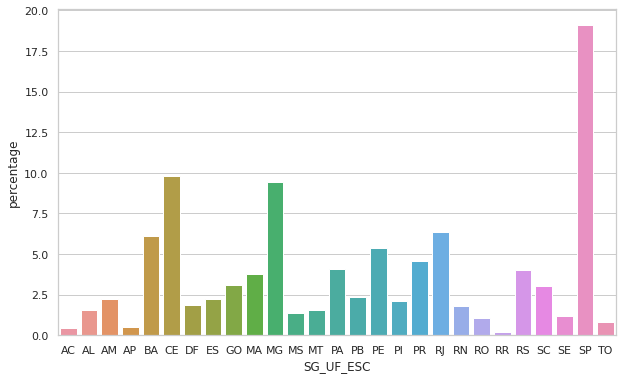

In [ ]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.barplot(data=sample_df, x='SG_UF_ESC', y='percentage')

#### 1. 2. 2. 6. **TP_DEPENDENCIA_ADM_ESC**
Dependência administrativa da escola.
  * 1: Federal
  * 2: Estadual
  * 3: Municipal
  * 4: Privada

In [ ]:
# Dependência administrativa das escolas
df['TP_DEPENDENCIA_ADM_ESC'].unique()

array([nan,  2.,  4.,  1.,  3.])

In [ ]:
# Distribuição de candidatos por dependência administrativa da escola
sample_df = df.groupby(["TP_DEPENDENCIA_ADM_ESC"])\
.agg(percentage=("TP_DEPENDENCIA_ADM_ESC" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df

,TP_DEPENDENCIA_ADM_ESC,percentage
0,1.0,4.278411
1,2.0,80.558509
2,3.0,0.841023
3,4.0,14.322057


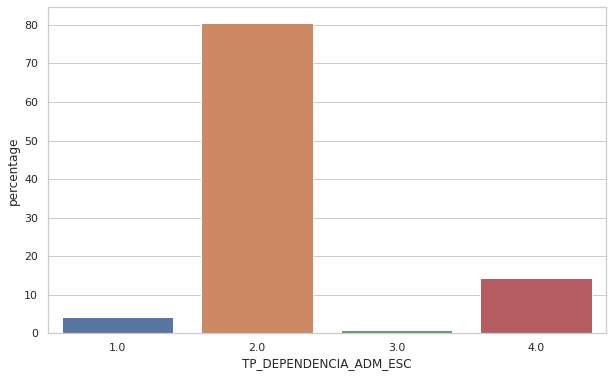

In [ ]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.barplot(data=sample_df, x='TP_DEPENDENCIA_ADM_ESC', y='percentage')

#### 1. 2. 2. 7. **TP_LOCALIZACAO_ESCOLA**
Localização da escola.
  * 1: Urbana
  * 2: Rural

In [ ]:
# Localização das escolas
df['TP_LOCALIZACAO_ESC'].unique()

array([nan,  1.,  2.])

In [ ]:
# Distribuição de candidatos por localização da escola
sample_df = df.groupby(["TP_LOCALIZACAO_ESC"])\
.agg(percentage=("TP_LOCALIZACAO_ESC" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df

,TP_LOCALIZACAO_ESC,percentage
0,1.0,96.379592
1,2.0,3.620408


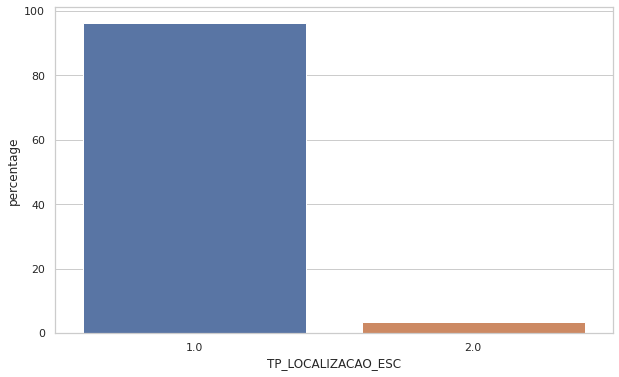

In [ ]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.barplot(data=sample_df, x='TP_LOCALIZACAO_ESC', y='percentage')

#### 1. 2. 2. 8. **TP_SIT_FUNC_ESC**
Situação de funcionamento da escola.
  * 1: Em atividade
  * 2: Paralisada
  * 3: Extinta

In [ ]:
# Localização das escolas
df['TP_SIT_FUNC_ESC'].unique()

array([nan,  1.,  4.,  2.,  3.])

In [ ]:
# Distribuição de candidatos por situação funcional da escola
sample_df = df.groupby(["TP_SIT_FUNC_ESC"])\
.agg(percentage=("TP_SIT_FUNC_ESC" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df

,TP_SIT_FUNC_ESC,percentage
0,1.0,99.734272
1,2.0,0.109638
2,3.0,0.017256
3,4.0,0.138834


### 1. 2. 3. **Dados dos pedidos de atendimento especializado**
Condições especiais (PCDs) que motivam atendimento especializado durante a prova. Os atributos dessa categoria não serão descritos neste momento pois não serão utilizados durante as análises exploratórias. Mais informações podem ser encontradas no dicionário de microdados disponibilizado pelo próprio Enem.

### 1. 2. 4. **Dados dos pedidos de atendimento específico**
Condições especiais (gestante, lactantes, idosos, internado em unidade hospitalar)que motivam atendimento específico durante a prova. Os atributos dessa categoria não serão descritos neste momento pois não serão utilizados durante as análises exploratórias. Mais informações podem ser encontradas no dicionário de microdados disponibilizado pelo próprio Enem.

### 1. 2. 5. **Dados dos pedidos de recursos especializados e específicos para realização das provas**
Solicitações de provas especiais motivadas a partir das categorias anteriores. Os atributos dessa categoria não serão descritos neste momento pois não serão utilizados durante as análises exploratórias. Mais informações podem ser encontradas no dicionário de microdados disponibilizado pelo próprio Enem.

### 1. 2. 6. **Dados do local de aplicação das provas**

#### 1. 2. 6. 1. **CO_MUNICIPIO_PROVA** (Removido da base)
Código do municipio de aplicação da prova.
  * 1º dígito: região
  * 1º e 2º dígitos: UF
  * 3º-6º dígitos: Município
  * 7º dígito: dígito verificador

#### 1. 2. 6. 2. **NO_MUNICIPIO_PROVA** (Removido da base)
Nome do município de aplicação da prova.

#### 1. 2. 6. 3. **CO_UF_PROVA** (Removido da base)
Código da Unidade da Federação de aplicação da prova.

#### 1. 2. 6. 4. **SG_UF_PROVA** (Removido da base)
Sigla da Unidade da Federação de aplicação da prova.

### 1. 2. 7. **Dados da prova objetiva**

#### 1. 2. 7. 1. **TP_PRESENCA_CN**
Presença na prova objetiva de Ciência da Natura.
  * 0: Faltou a prova
  * 1: Presente na prova
  * 2: Eliminado na prova

In [ ]:
# Distribuição de presença em CN
sample_df = df.groupby(["TP_PRESENCA_CN"])\
.agg(percentage=("TP_PRESENCA_CN" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df

,TP_PRESENCA_CN,percentage
0,0,27.141349
1,1,72.821126
2,2,0.037525


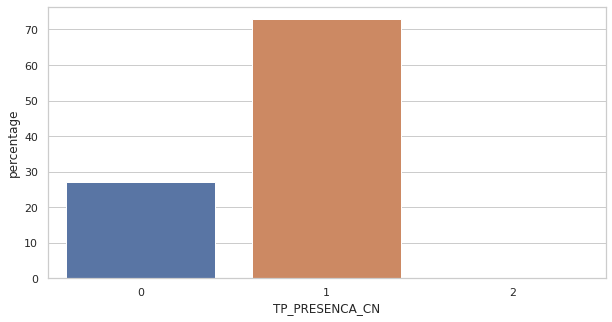

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.barplot(data=sample_df, x='TP_PRESENCA_CN', y='percentage')

#### 1. 2. 7. 2. **TP_PRESENCA_CH**
Presença na prova objetiva de Ciências Humanas.
  * 0: Faltou a prova
  * 1: Presente na prova
  * 2: Eliminado na prova

In [ ]:
# Distribuição de presença em CH
sample_df = df.groupby(["TP_PRESENCA_CH"])\
.agg(percentage=("TP_PRESENCA_CH" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df

,TP_PRESENCA_CH,percentage
0,0,22.924261
1,1,76.995822
2,2,0.079917


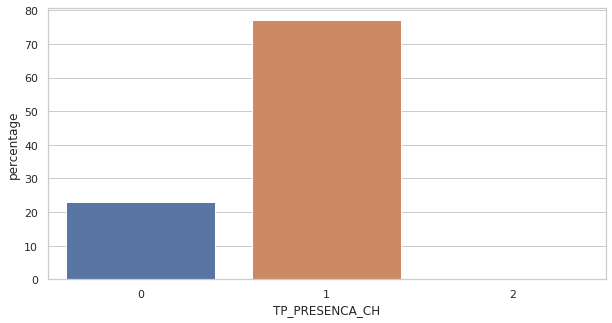

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.barplot(data=sample_df, x='TP_PRESENCA_CH', y='percentage')

#### 1. 2. 7. 3. **TP_PRESENCA_LC**
Presença na prova objetiva de Linguagens e Códigos.
  * 0: Faltou a prova
  * 1: Presente na prova
  * 2: Eliminado na prova

In [ ]:
# Distribuição de presença em LC
sample_df = df.groupby(["TP_PRESENCA_LC"])\
.agg(percentage=("TP_PRESENCA_LC" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df

,TP_PRESENCA_LC,percentage
0,0,22.924261
1,1,76.995822
2,2,0.079917


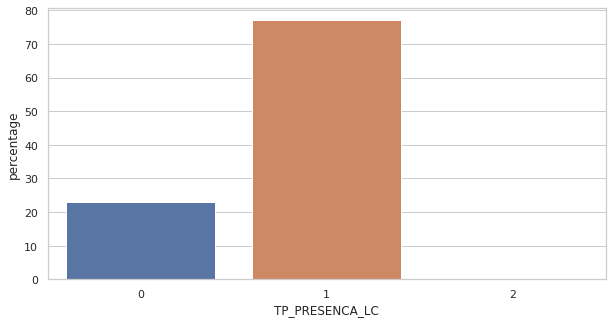

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.barplot(data=sample_df, x='TP_PRESENCA_LC', y='percentage')

#### 1. 2. 7. 4. **TP_PRESENCA_MT**
Presença na prova objetiva de Matemática.
  * 0: Faltou a prova
  * 1: Presente na prova
  * 2: Eliminado na prova

In [ ]:
# Distribuição de presença em MT
sample_df = df.groupby(["TP_PRESENCA_MT"])\
.agg(percentage=("TP_PRESENCA_MT" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df

,TP_PRESENCA_MT,percentage
0,0,27.141349
1,1,72.821126
2,2,0.037525


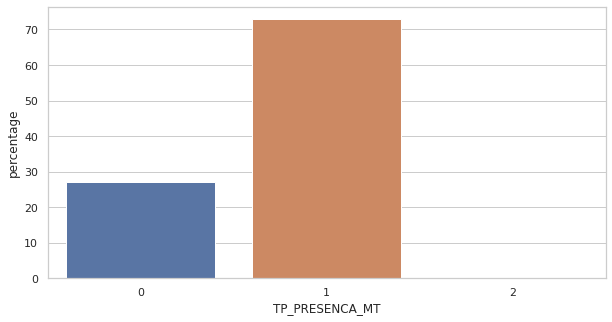

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.barplot(data=sample_df, x='TP_PRESENCA_MT', y='percentage')

#### 1. 2. 7. 5. **CO_PROVA_CN** (Removido da base)
Código do tipo de prova de Ciências da Natureza.

Os tipos dessa categoria não serão descritos neste momento pois não serão utilizados durante as análises exploratórias. Mais informações podem ser encontradas no dicionário de microdados disponibilizado pelo próprio Enem.

#### 1. 2. 7. 6. **CO_PROVA_CH** (Removido da base)
Código do tipo de prova de Ciências Humanas.

Os tipos dessa categoria não serão descritos neste momento pois não serão utilizados durante as análises exploratórias. Mais informações podem ser encontradas no dicionário de microdados disponibilizado pelo próprio Enem.

#### 1. 2. 7. 7. **CO_PROVA_LC** (Removido da base)
Código do tipo de prova de Linguagens e Códigos.

Os tipos dessa categoria não serão descritos neste momento pois não serão utilizados durante as análises exploratórias. Mais informações podem ser encontradas no dicionário de microdados disponibilizado pelo próprio Enem.

#### 1. 2. 7. 8. **CO_PROVA_MT** (Removido da base)
Código do tipo de prova de Matemática.

Os tipos dessa categoria não serão descritos neste momento pois não serão utilizados durante as análises exploratórias. Mais informações podem ser encontradas no dicionário de microdados disponibilizado pelo próprio Enem.

#### 1. 2. 7. 9. **NU_NOTA_CN**
Nota da prova de Ciências da Natureza.

In [ ]:
# Informações da nota de CN
df['NU_NOTA_CN'].describe().apply(lambda x: format(x, 'f'))

count    3710433.000000
mean         477.824087
std           76.097745
min            0.000000
25%          417.800000
50%          470.300000
75%          533.200000
max          860.900000
Name: NU_NOTA_CN, dtype: object

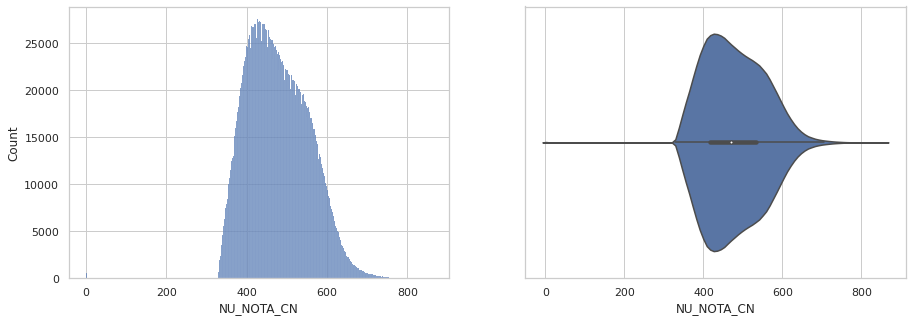

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax1 = sns.histplot(data=df, x='NU_NOTA_CN', ax=axes[0])
ax2 = sns.violinplot(data=df, x='NU_NOTA_CN', ax=axes[1])

#### 1. 2. 7. 10. **NU_NOTA_CH**
Nota da prova de Ciências Humanas.

In [ ]:
# Informações da nota de CH
df['NU_NOTA_CH'].describe().apply(lambda x: format(x, 'f'))

count    3923145.000000
mean         507.248663
std           82.411634
min            0.000000
25%          447.900000
50%          510.600000
75%          566.600000
max          835.100000
Name: NU_NOTA_CH, dtype: object

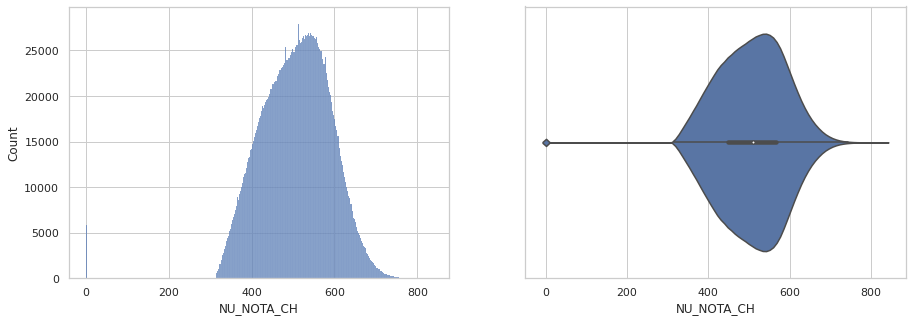

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax1 = sns.histplot(data=df, x='NU_NOTA_CH', ax=axes[0])
ax2 = sns.violinplot(data=df, x='NU_NOTA_CH', ax=axes[1])

#### 1. 2. 7. 11. **NU_NOTA_LC**
Nota da prova de Linguagens e Códigos.

In [ ]:
# Informações da nota de LC
df['NU_NOTA_LC'].describe().apply(lambda x: format(x, 'f'))

count    3923145.000000
mean         520.517658
std           64.150655
min            0.000000
25%          483.500000
50%          526.200000
75%          565.300000
max          801.700000
Name: NU_NOTA_LC, dtype: object

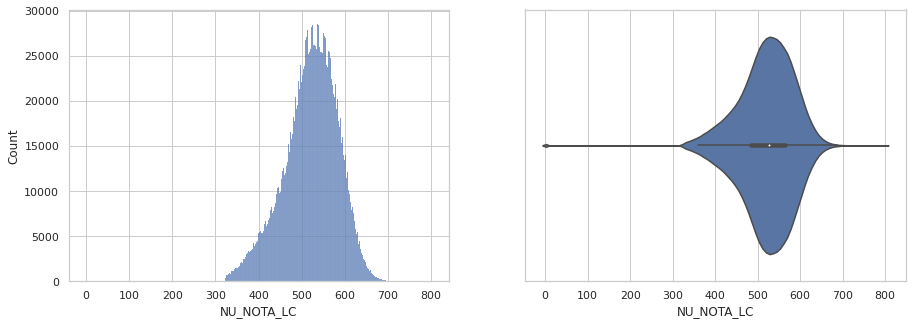

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax1 = sns.histplot(data=df, x='NU_NOTA_LC', ax=axes[0])
ax2 = sns.violinplot(data=df, x='NU_NOTA_LC', ax=axes[1])

#### 1. 2. 7. 12. **NU_NOTA_MT**
Nota da prova de Matemática.

In [ ]:
# Informações da nota de MT
df['NU_NOTA_MT'].describe().apply(lambda x: format(x, 'f'))

count    3710433.000000
mean         523.124122
std          109.063686
min            0.000000
25%          435.100000
50%          501.100000
75%          597.800000
max          985.500000
Name: NU_NOTA_MT, dtype: object

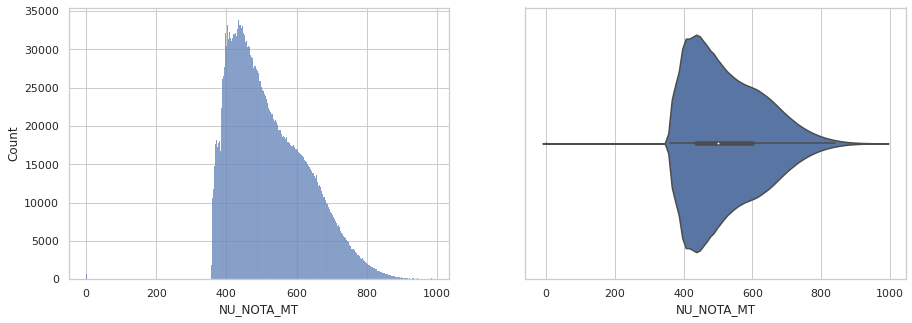

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax1 = sns.histplot(data=df, x='NU_NOTA_MT', ax=axes[0])
ax2 = sns.violinplot(data=df, x='NU_NOTA_MT', ax=axes[1])

#### 1. 2. 7. 13. **TX_RESPOSTAS_CN** (Removido da base)
Vetor com as respostas da parte objetiva da prova de Ciências da Natureza.

#### 1. 2. 7. 14. **TX_RESPOSTAS_CH** (Removido da base)
Vetor com as respostas da parte objetiva da prova de Ciências Humanas.

#### 1. 2. 7. 15. **TX_RESPOSTAS_LC** (Removido da base)
Vetor com as respostas da parte objetiva da prova de Linguagens e Códigos.

#### 1. 2. 7. 16. **TX_RESPOSTAS_MT** (Removido da base)
Vetor com as respostas da parte objetiva da prova de Matemática.

#### 1. 2. 7. 17. **TP_LINGUA**
Língua Estrangeira.
  * 0: Inglês
  * 1: Espanhol

In [ ]:
# Distribuição do tipo de prova de língua estrangeira
sample_df = df.groupby(["TP_LINGUA"])\
.agg(percentage=("TP_LINGUA" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df

,TP_LINGUA,percentage
0,0,47.529807
1,1,52.470193


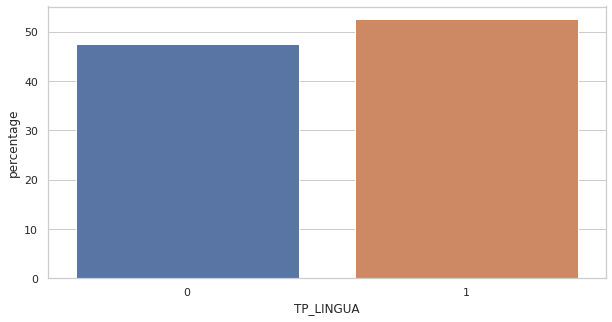

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.barplot(data=sample_df, x='TP_LINGUA', y='percentage')

#### 1. 2. 7. 18. **TX_GABARITO_CN** (Removido da base)
Vetor com o gabarito da parte objetiva da prova de Ciências da Natureza.

#### 1. 2. 7. 19. **TX_GABARITO_CH** (Removido da base)
Vetor com o gabarito da parte objetiva da prova de Ciências Humanas.

#### 1. 2. 7. 20. **TX_GABARITO_LC** (Removido da base)
Vetor com o gabarito da parte objetiva da prova de Linguagens e Códigos.

#### 1. 2. 7. 21. **TX_GABARITO_MT** (Removido da base)
Vetor com o gabarito da parte objetiva da prova de Matemática.

### 1. 2. 8. **Dados da redação**

#### 1. 2. 8. 1. **TP_STATUS_REDACAO**
Situação da redação do participante.
  *	1:	Sem problemas
  * 2:	Anulada
  * 3:	Cópia Texto Motivador
  * 4:	Em Branco
  * 6:	Fuga ao tema
  * 7:	Não atendimento ao tipo textual
  * 8:	Texto insuficiente
  * 9:	Parte desconectada

In [ ]:
# Distribuição do status da redação
sample_df = df.groupby(["TP_STATUS_REDACAO"])\
.agg(percentage=("TP_STATUS_REDACAO" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df

,TP_STATUS_REDACAO,percentage
0,1.0,96.337402
1,2.0,0.144247
2,3.0,0.593019
3,4.0,1.450393
4,6.0,1.035471
5,7.0,0.096861
6,8.0,0.218651
7,9.0,0.123957


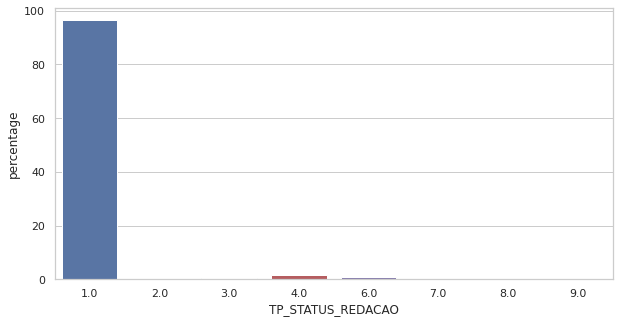

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.barplot(data=sample_df, x='TP_STATUS_REDACAO', y='percentage')

#### 1. 2. 8. 2. **NU_NOTA_COMP1**
Nota da competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.

In [ ]:
# Informações da nota da competência 1
df['NU_NOTA_COMP1'].describe().apply(lambda x: format(x, 'f'))

count    3923144.000000
mean         120.477724
std           33.426833
min            0.000000
25%          120.000000
50%          120.000000
75%          140.000000
max          200.000000
Name: NU_NOTA_COMP1, dtype: object

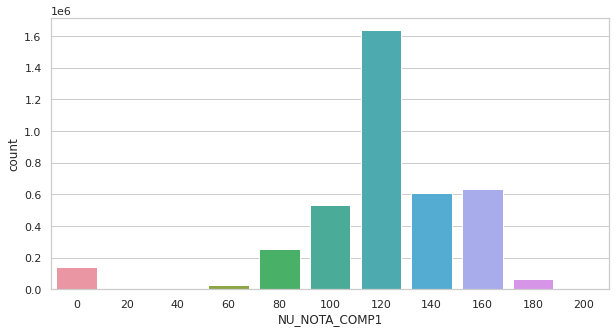

In [ ]:
sample_df = df.groupby(["NU_NOTA_COMP1"])\
.agg(count=("NU_NOTA_COMP1" , "count"))\
.reset_index()

sample_df['NU_NOTA_COMP1'] = sample_df['NU_NOTA_COMP1'].astype(int) 

plt.figure(figsize=(10,5))
ax1 = sns.barplot(data=sample_df, x='NU_NOTA_COMP1', y='count')

#### 1. 2. 8. 3. **NU_NOTA_COMP2**
Nota da competência 2 - Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.

In [ ]:
# Informações da nota da competência 2
df['NU_NOTA_COMP2'].describe().apply(lambda x: format(x, 'f'))

count    3923144.000000
mean         122.736576
std           42.931276
min            0.000000
25%          120.000000
50%          120.000000
75%          140.000000
max          200.000000
Name: NU_NOTA_COMP2, dtype: object

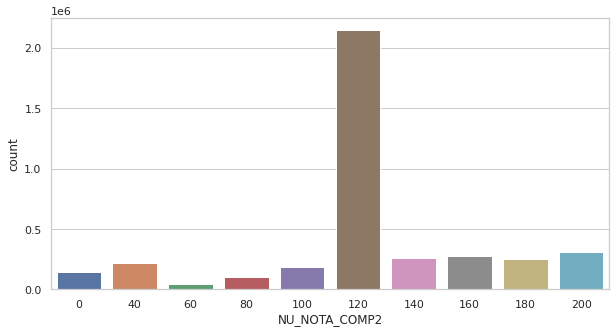

In [ ]:
sample_df = df.groupby(["NU_NOTA_COMP2"])\
.agg(count=("NU_NOTA_COMP2" , "count"))\
.reset_index()

sample_df['NU_NOTA_COMP2'] = sample_df['NU_NOTA_COMP2'].astype(int) 

plt.figure(figsize=(10,5))
ax1 = sns.barplot(data=sample_df, x='NU_NOTA_COMP2', y='count')

#### 1. 2. 8. 4. **NU_NOTA_COMP3**
Nota da competência 3 - Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.

In [ ]:
# Informações da nota da competência 3
df['NU_NOTA_COMP3'].describe().apply(lambda x: format(x, 'f'))

count    3923144.000000
mean         114.813129
std           40.177100
min            0.000000
25%          100.000000
50%          120.000000
75%          140.000000
max          200.000000
Name: NU_NOTA_COMP3, dtype: object

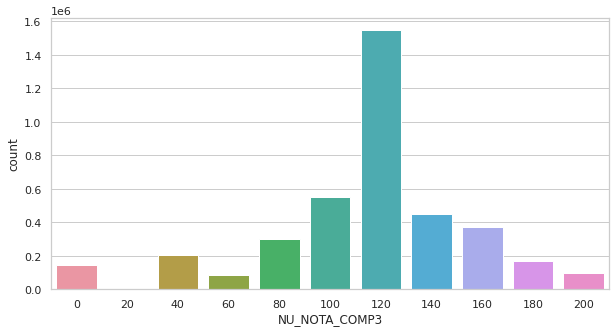

In [ ]:
sample_df = df.groupby(["NU_NOTA_COMP3"])\
.agg(count=("NU_NOTA_COMP3" , "count"))\
.reset_index()

sample_df['NU_NOTA_COMP3'] = sample_df['NU_NOTA_COMP3'].astype(int) 

plt.figure(figsize=(10,5))
ax1 = sns.barplot(data=sample_df, x='NU_NOTA_COMP3', y='count')

#### 1. 2. 8. 5. **NU_NOTA_COMP4**
Nota da competência 4 - Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.

In [ ]:
# Informações da nota da competência 4
df['NU_NOTA_COMP4'].describe().apply(lambda x: format(x, 'f'))

count    3923144.000000
mean         121.628602
std           38.122350
min            0.000000
25%          100.000000
50%          120.000000
75%          140.000000
max          200.000000
Name: NU_NOTA_COMP4, dtype: object

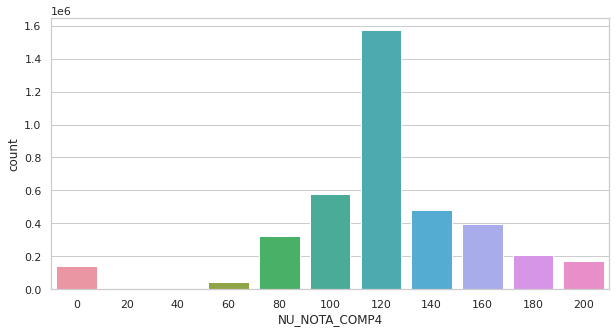

In [ ]:
sample_df = df.groupby(["NU_NOTA_COMP4"])\
.agg(count=("NU_NOTA_COMP4" , "count"))\
.reset_index()

sample_df['NU_NOTA_COMP4'] = sample_df['NU_NOTA_COMP4'].astype(int) 

plt.figure(figsize=(10,5))
ax1 = sns.barplot(data=sample_df, x='NU_NOTA_COMP4', y='count')

#### 1. 2. 8. 6. **NU_NOTA_COMP5**
Nota da competência 5 - Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos.

In [ ]:
# Informações da nota da competência 5
df['NU_NOTA_COMP5'].describe().apply(lambda x: format(x, 'f'))

count    3923144.000000
mean          91.532317
std           59.441870
min            0.000000
25%           40.000000
50%          100.000000
75%          140.000000
max          200.000000
Name: NU_NOTA_COMP5, dtype: object

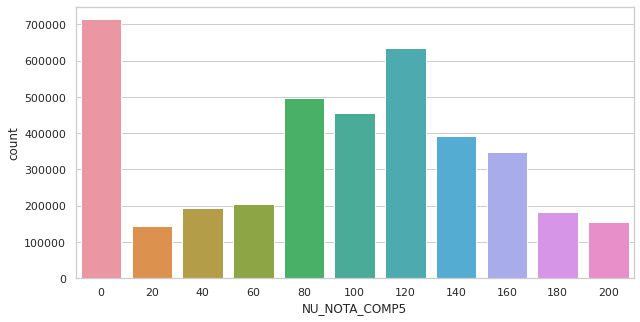

In [ ]:
sample_df = df.groupby(["NU_NOTA_COMP5"])\
.agg(count=("NU_NOTA_COMP5" , "count"))\
.reset_index()

sample_df['NU_NOTA_COMP5'] = sample_df['NU_NOTA_COMP5'].astype(int) 

plt.figure(figsize=(10,5))
ax1 = sns.barplot(data=sample_df, x='NU_NOTA_COMP5', y='count')

#### 1. 2. 8. 7. **NU_NOTA_REDACAO**
Nota da prova de redação.

In [ ]:
# Informações da nota da redação
df['NU_NOTA_REDACAO'].describe().apply(lambda x: format(x, 'f'))

count    3923144.000000
mean         571.188348
std          188.763272
min            0.000000
25%          480.000000
50%          580.000000
75%          680.000000
max         1000.000000
Name: NU_NOTA_REDACAO, dtype: object

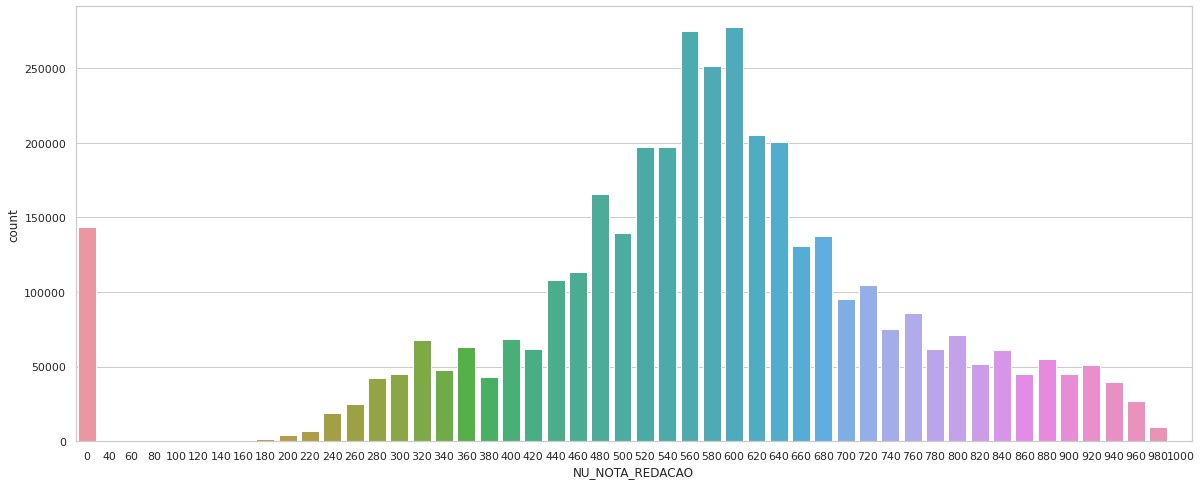

In [ ]:
sample_df = df.groupby(["NU_NOTA_REDACAO"])\
.agg(count=("NU_NOTA_REDACAO" , "count"))\
.reset_index()

sample_df['NU_NOTA_REDACAO'] = sample_df['NU_NOTA_REDACAO'].astype(int) 

plt.figure(figsize=(20,8))
ax1 = sns.barplot(data=sample_df, x='NU_NOTA_REDACAO', y='count')

### 1. 2. 9. **Dados do questionário socioeconômico**
A descrição completa das perguntas e possíveis respostas encontra-se no dicionário de microdados do Enem, aqui descreveremos as perguntas de interesse desta análise.

#### **Q001**
Até que série seu pai, ou o homem responsável por você, estudou?
  * **A:** Nunca estudou.
  * **B:** Não completou a 4ª série/5º ano do Ensino Fundamental.
  * **C:** Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
  * **D:** Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
  * **E:** Completou o Ensino Médio, mas não completou a Faculdade.
  * **F:** Completou a Faculdade, mas não completou a Pós-graduação.
  * **G:** Completou a Pós-graduação.
  * **H:** Não sei.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q001"])\
.agg(percentage=("Q001" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q001,percentage
4,E,25.690317
1,B,22.291576
2,C,14.199797
3,D,11.513031
7,H,8.729783
5,F,7.373917
0,A,5.703623
6,G,4.497956


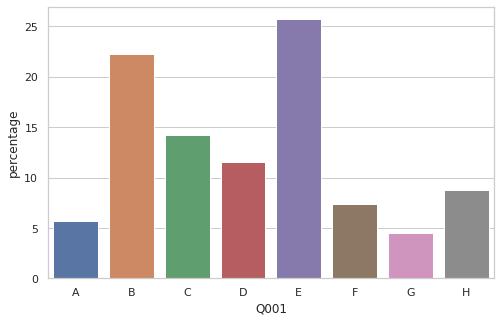

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q001', y='percentage')

#### **Q002**
Até que série sua mãe, ou a mulher responsável por você, estudou?	
  * **A:**	Nunca estudou.
  * **B:**	Não completou a 4ª série/5º ano do Ensino Fundamental.
  * **C:**	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
  * **D:**	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
  * **E:**	Completou o Ensino Médio, mas não completou a Faculdade.
  * **F:**	Completou a Faculdade, mas não completou a Pós-graduação.
  * **G:**	Completou a Pós-graduação.
  * **H:**	Não sei.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q002"])\
.agg(percentage=("Q002" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q002,percentage
4,E,32.062913
1,B,16.776854
2,C,13.467353
3,D,13.098717
5,F,10.082115
6,G,7.840016
0,A,3.819719
7,H,2.852312


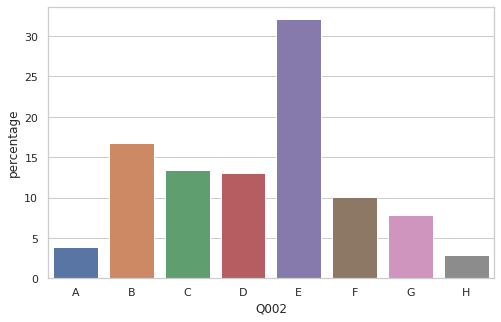

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q002', y='percentage')

#### **Q003**
A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).
  * **A	Grupo 1:** Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.
  * **B	Grupo 2:** Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.
  * **C	Grupo 3:** Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.
  * **D	Grupo 4:** Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.
  * **E	Grupo 5:** Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.
  * **F:**	Não sei.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q003"])\
.agg(percentage=("Q003" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q003,percentage
2,C,23.613704
0,A,21.442279
1,B,21.178014
3,D,16.986813
5,F,11.287370
4,E,5.491819


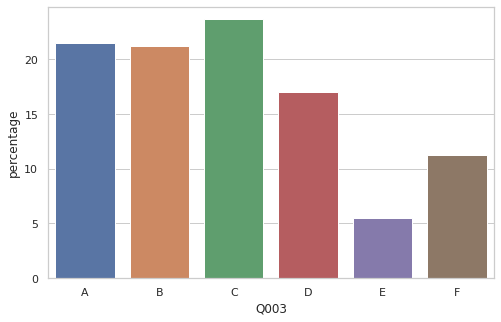

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q003', y='percentage')

#### **Q004**
A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você. (Se ela não estiver trabalhando, escolha uma ocupação pensando no último trabalho dela).	
  * **A	Grupo 1:** Lavradora, agricultora sem empregados, bóia fria, criadora de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultora, pescadora, lenhadora, seringueira, extrativista.
  * **B	Grupo 2:** Diarista, empregada doméstica, cuidadora de idosos, babá, cozinheira (em casas particulares), motorista particular, jardineira, faxineira de empresas e prédios, vigilante, porteira, carteira, office-boy, vendedora, caixa, atendente de loja, auxiliar administrativa, recepcionista, servente de pedreiro, repositora de mercadoria.
  * **C	Grupo 3:** Padeira, cozinheira industrial ou em restaurantes, sapateira, costureira, joalheira, torneira mecânica, operadora de máquinas, soldadora, operária de fábrica, trabalhadora da mineração, pedreira, pintora, eletricista, encanadora, motorista, caminhoneira, taxista.
  * **D	Grupo 4:** Professora (de ensino fundamental ou médio, idioma, música, artes etc.), técnica (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretora de imóveis, supervisora, gerente, mestre de obras, pastora, microempresária (proprietária de empresa com menos de 10 empregados), pequena comerciante, pequena proprietária de terras, trabalhadora autônoma ou por conta própria.
  * **E	Grupo 5:** Médica, engenheira, dentista, psicóloga, economista, advogada, juíza, promotora, defensora, delegada, tenente, capitã, coronel, professora universitária, diretora em empresas públicas ou privadas, política, proprietária de empresas com mais de 10 empregados.
  * **F:**	Não sei.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q004"])\
.agg(percentage=("Q004" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q004,percentage
1,B,43.261142
3,D,20.087827
0,A,17.449595
5,F,8.585708
2,C,6.857242
4,E,3.758486


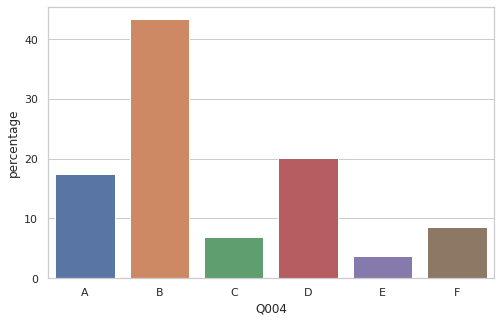

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q004', y='percentage')

#### **Q005**
 Incluindo você, quantas pessoas moram atualmente em sua residência?
  * 1, pois moro sozinho(a).
  * 2
  * 3
  * 4
  * 5
  * 6
  * 7
  * 8
  * 9
  * 10
  * 11
  * 12
  * 13
  * 14
  * 15
  * 16
  * 17
  * 18
  * 19
  * 20

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q005"])\
.agg(percentage=("Q005" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q005,percentage
3,4,32.175881
2,3,25.510680
4,5,16.297311
1,2,12.669731
5,6,6.022075
0,1,2.787173
6,7,2.529405
7,8,1.090148
8,9,0.410577
9,10,0.278533


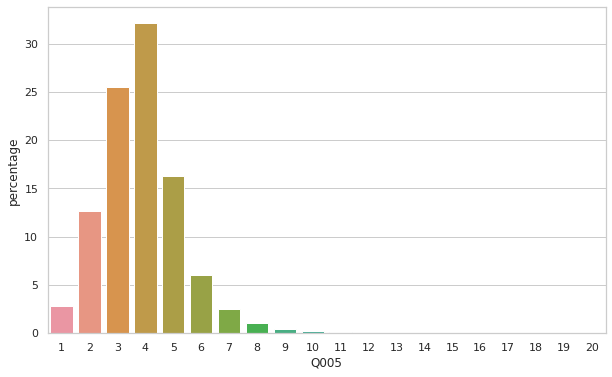

In [ ]:
plt.figure(figsize=(10,6))
ax1 = sns.barplot(data=sample_df, x='Q005', y='percentage')

#### **Q006**
Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)

  * **A:**	Nenhuma renda.
  * **B:**	Até R\$ 998,00.
  * **C:**	De R\$ 998,01 até R\$ 1.497,00.
  * **D:**	De R\$ 1.497,01 até R\$ 1.996,00.
  * **E:**	De R\$ 1.996,01 até R\$ 2.495,00.
  * **F:**	De R\$ 2.495,01 até R\$ 2.994,00.
  * **G:**	De R\$ 2.994,01 até R\$ 3.992,00.
  * **H:**	De R\$ 3.992,01 até R\$ 4.990,00.
  * **I:**	De R\$ 4.990,01 até R\$ 5.988,00.
  * **J:**	De R\$ 5.988,01 até R\$ 6.986,00.
  * **K:**	De R\$ 6.986,01 até R\$ 7.984,00.
  * **L:**	De R\$ 7.984,01 até R\$ 8.982,00.
  * **M:**	De R\$ 8.982,01 até R\$ 9.980,00.
  * **N:**	De R\$ 9.980,01 até R\$ 11.976,00.
  * **O:**	De R\$ 11.976,01 até R\$ 14.970,00.
  * **P:**	De R\$ 14.970,01 até R\$ 19.960,00.
  * **Q:**	Mais de R\$ 19.960,00.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q006"])\
.agg(percentage=("Q006" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q006,percentage
2,C,25.738872
1,B,24.988862
3,D,9.805486
4,E,9.333519
6,G,5.925535
0,A,4.554714
5,F,4.440412
7,H,3.786100
8,I,2.819321
9,J,1.585569


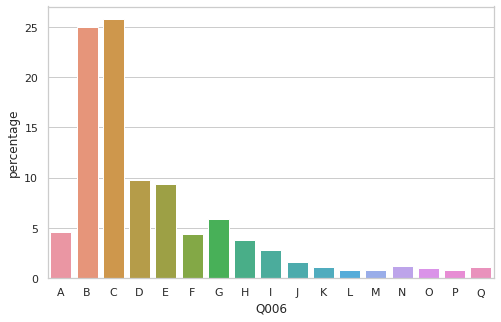

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q006', y='percentage')

#### **Q007**
Em sua residência trabalha empregado(a) doméstico(a)?
  * **A:**	Não.
  * **B:**	Sim, um ou dois dias por semana.
  * **C:**	Sim, três ou quatro dias por semana.
  * **D:**	Sim, pelo menos cinco dias por semana.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q007"])\
.agg(percentage=("Q007" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q007,percentage
0,A,92.734085
1,B,3.884701
3,D,2.554585
2,C,0.826629


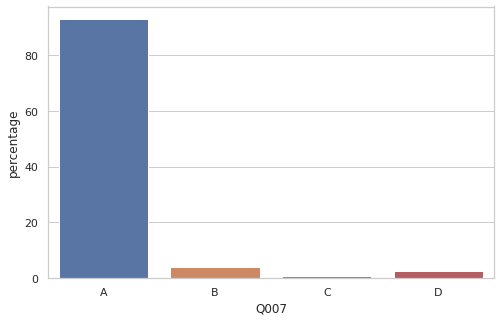

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q007', y='percentage')

#### **Q008**
Na sua residência tem banheiro?
  * **A:**	Não.
  * **B:**	Sim, um.
  * **C:**	Sim, dois.
  * **D:**	Sim, três.
  * **E:**	Sim, quatro ou mais.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q008"])\
.agg(percentage=("Q008" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q008,percentage
1,B,70.661358
2,C,20.207879
3,D,5.384994
4,E,2.776026
0,A,0.969743


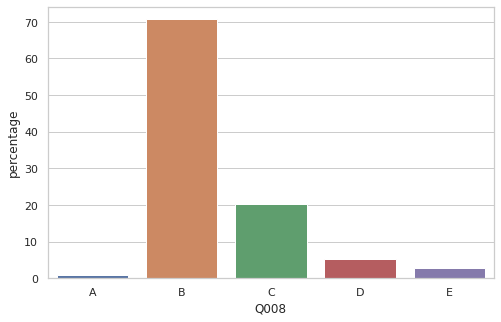

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q008', y='percentage')

#### **Q009**
Na sua residência tem quartos para dormir?
  * **A:**	Não.
  * **B:**	Sim, um.
  * **C:**	Sim, dois.
  * **D:**	Sim, três.
  * **E:**	Sim, quatro ou mais.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q009"])\
.agg(percentage=("Q009" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q009,percentage
2,C,50.569567
3,D,30.109553
1,B,13.686929
4,E,4.831324
0,A,0.802627


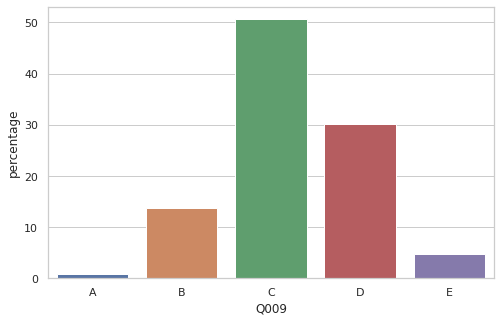

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q009', y='percentage')

#### **Q010**
Na sua residência tem carro?
  * **A:**	Não.
  * **B:**	Sim, um.
  * **C:**	Sim, dois.
  * **D:**	Sim, três.
  * **E:**	Sim, quatro ou mais.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q010"])\
.agg(percentage=("Q010" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q010,percentage
0,A,56.869764
1,B,34.498388
2,C,7.375703
3,D,1.030583
4,E,0.225562


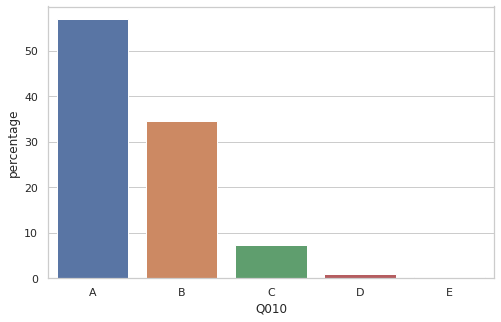

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q010', y='percentage')

####  **Q011**
Na sua residência tem motocicleta?
  * **A:**	Não.
  * **B:**	Sim, uma.
  * **C:**	Sim, duas.
  * **D:**	Sim, três.
  * **E:**	Sim, quatro ou mais.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q011"])\
.agg(percentage=("Q011" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q011,percentage
0,A,77.586389
1,B,20.267935
2,C,1.923588
3,D,0.187193
4,E,0.034895


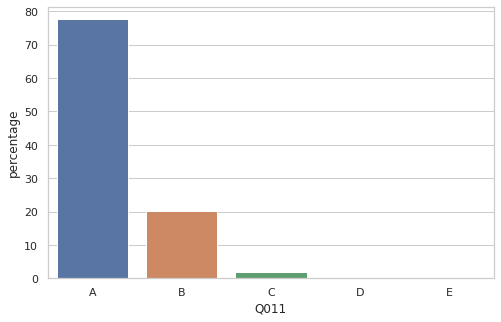

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q011', y='percentage')

#### **Q012**
Na sua residência tem geladeira?
  * **A:**	Não.
  * **B:**	Sim, uma.
  * **C:**	Sim, duas.
  * **D:**	Sim, três.
  * **E:**	Sim, quatro ou mais.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q012"])\
.agg(percentage=("Q012" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q012,percentage
1,B,94.092109
2,C,3.864015
0,A,1.715611
3,D,0.274156
4,E,0.054109


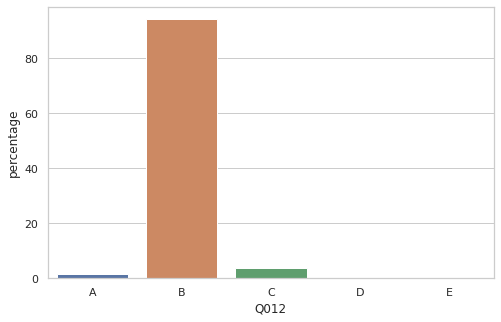

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q012', y='percentage')

#### **Q013** 
Na sua residência tem freezer (independente ou segunda porta da geladeira)?
  * **A:**	Não.
  * **B:**	Sim, um.
  * **C:**	Sim, dois.
  * **D:**	Sim, três.
  * **E:**	Sim, quatro ou mais.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q013"])\
.agg(percentage=("Q013" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q013,percentage
0,A,64.026990
1,B,33.523366
2,C,2.132703
3,D,0.255531
4,E,0.061410


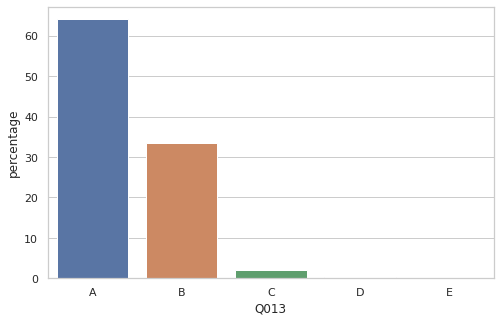

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q013', y='percentage')

#### **Q014** 
Na sua residência tem máquina de lavar roupa? (o tanquinho NÃO deve ser considerado)
  * **A:**	Não.
  * **B:**	Sim, uma.
  * **C:**	Sim, duas.
  * **D:**	Sim, três.
  * **E:**	Sim, quatro ou mais.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q014"])\
.agg(percentage=("Q014" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q014,percentage
1,B,58.137822
0,A,40.964777
2,C,0.853811
3,D,0.034090
4,E,0.009499


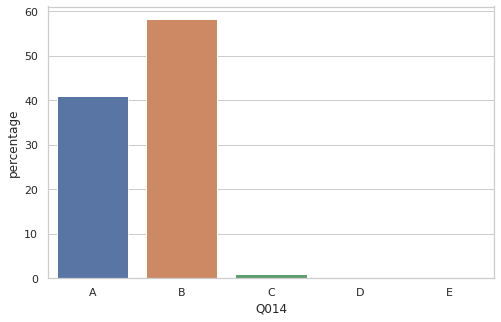

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q014', y='percentage')

#### **Q015**
Na sua residência tem máquina de secar roupa (independente ou em conjunto com a máquina de lavar roupa)?
  * **A:**	Não.
  * **B:**	Sim, uma.
  * **C:**	Sim, duas.
  * **D:**	Sim, três.
  * **E:**	Sim, quatro ou mais.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q015"])\
.agg(percentage=("Q015" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q015,percentage
0,A,88.629238
1,B,11.233575
2,C,0.120406
3,D,0.010363
4,E,0.006418


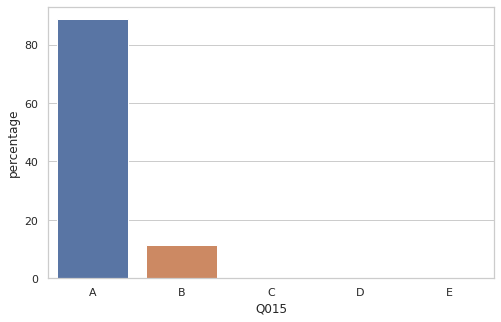

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q015', y='percentage')

#### **Q016**
Na sua residência tem forno micro-ondas?
  * **A:**	Não.
  * **B:**	Sim, um.
  * **C:**	Sim, dois.
  * **D:**	Sim, três.
  * **E:**	Sim, quatro ou mais.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q016"])\
.agg(percentage=("Q016" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q016,percentage
0,A,50.863801
1,B,48.631181
2,C,0.473262
3,D,0.023806
4,E,0.007949


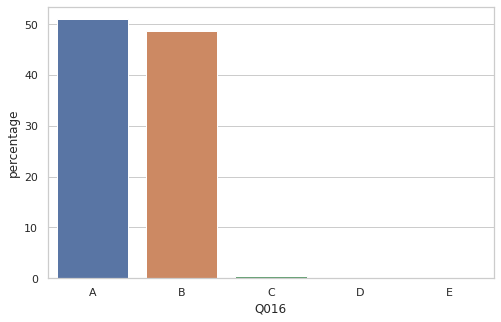

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q016', y='percentage')

#### **Q017**
Na sua residência tem máquina de lavar louça?
  * **A:**	Não.
  * **B:**	Sim, uma.
  * **C:**	Sim, duas.
  * **D:**	Sim, três.
  * **E:**	Sim, quatro ou mais.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q017"])\
.agg(percentage=("Q017" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q017,percentage
0,A,97.554006
1,B,2.398852
2,C,0.033757
3,D,0.007635
4,E,0.005750


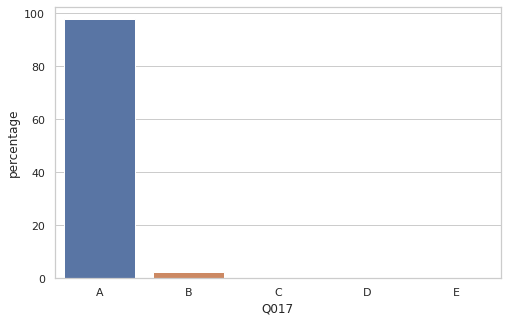

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q017', y='percentage')

#### **Q018**
Na sua residência tem aspirador de pó?
  * **A:**	Não.
  * **B:**	Sim.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q018"])\
.agg(percentage=("Q018" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q018,percentage
0,A,80.910099
1,B,19.089901


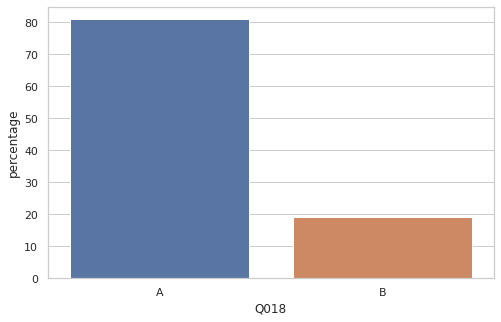

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q018', y='percentage')

#### **Q019**
Na sua residência tem televisão em cores?
  * **A:**	Não.
  * **B:**	Sim, uma.
  * **C:**	Sim, duas.
  * **D:**	Sim, três.
  * **E:**	Sim, quatro ou mais.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q019"])\
.agg(percentage=("Q019" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q019,percentage
1,B,69.072846
2,C,17.842528
3,D,5.630555
0,A,4.929121
4,E,2.524950


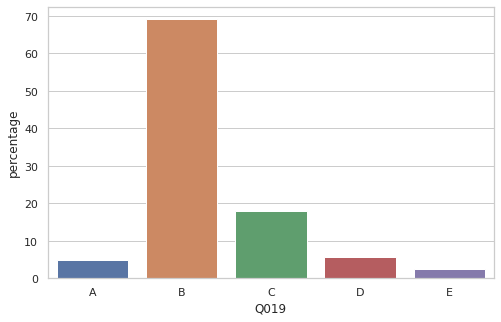

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q019', y='percentage')

#### **Q020**
Na sua residência tem aparelho de DVD?
  * **A:**	Não.
  * **B:**	Sim.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q020"])\
.agg(percentage=("Q020" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q020,percentage
0,A,69.601572
1,B,30.398428


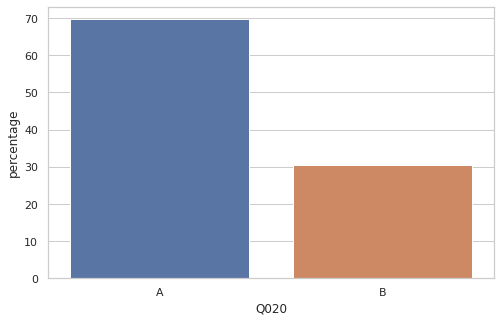

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q020', y='percentage')

#### **Q021**
Na sua residência tem TV por assinatura?
  * **A:**	Não.
  * **B:**	Sim.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q021"])\
.agg(percentage=("Q021" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q021,percentage
0,A,78.170244
1,B,21.829756


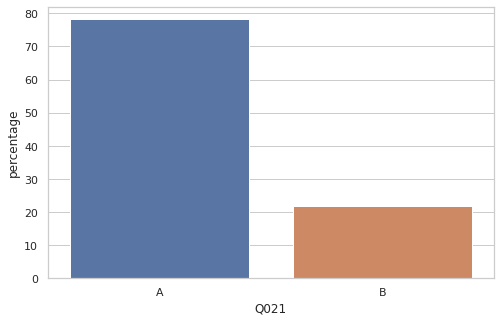

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q021', y='percentage')

#### **Q022**
Na sua residência tem telefone celular?
  * **A:**	Não.
  * **B:**	Sim, um.
  * **C:**	Sim, dois.
  * **D:**	Sim, três.
  * **E:**	Sim, quatro ou mais.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q022"])\
.agg(percentage=("Q022" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q022,percentage
2,C,31.304111
3,D,27.206723
1,B,21.302443
4,E,18.040830
0,A,2.145892


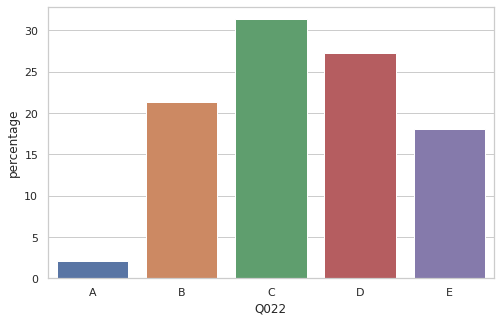

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q022', y='percentage')

#### **Q023**
Na sua residência tem telefone fixo?
  * **A:**	Não.
  * **B:**	Sim.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q023"])\
.agg(percentage=("Q023" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q023,percentage
0,A,76.380153
1,B,23.619847


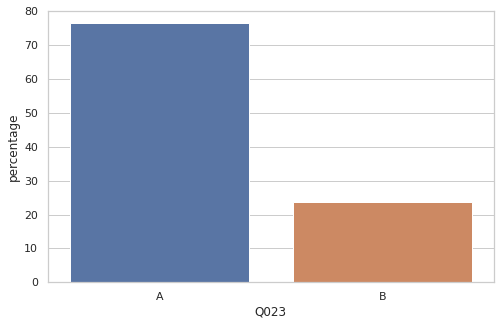

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q023', y='percentage')

#### **Q024**
Na sua residência tem computador?
  * **A:**	Não.
  * **B:**	Sim, um.
  * **C:**	Sim, dois.
  * **D:**	Sim, três.
  * **E:**	Sim, quatro ou mais.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q024"])\
.agg(percentage=("Q024" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q024,percentage
0,A,46.032242
1,B,43.235864
2,C,7.548314
3,D,2.250224
4,E,0.933356


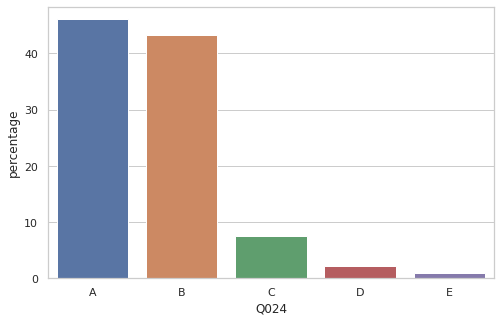

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q024', y='percentage')

#### **Q025**
Na sua residência tem acesso à Internet?
  * **A:**	Não.
  * **B:**	Sim.

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q025"])\
.agg(percentage=("Q025" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q025,percentage
1,B,77.617182
0,A,22.382818


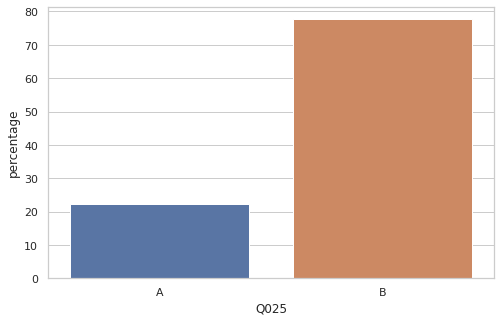

In [ ]:
plt.figure(figsize=(8,5))
ax1 = sns.barplot(data=sample_df, x='Q025', y='percentage')

# 2. **Limpeza e preparação da base de dados**

## 2. 1. **Correção dos tipos de dados**
---
Há muitas variáveis categóricas reprentadas como um identificador inteiro. São exemplos: sexo, estado civil, códigos de escolas, município, etc.

Há uma variável de ano de conclusão do Ensino médio que, ao contrário do que parece, não é o número correspondente ao ano, mas sim uma variável categórica.

Essas colunas serão convertidas adequadamente à seguir.


In [ ]:
# df['CO_MUNICIPIO_RESIDENCIA'] = df['CO_MUNICIPIO_RESIDENCIA'].astype('category')
df['CO_UF_RESIDENCIA'] = df['CO_UF_RESIDENCIA'].astype('category')
df['TP_SEXO'] = df['TP_SEXO'].astype('category')
df['TP_ESTADO_CIVIL'] = df['TP_ESTADO_CIVIL'].astype('category')
df['TP_COR_RACA'] = df['TP_COR_RACA'].astype('category')
df['TP_NACIONALIDADE'] = df['TP_NACIONALIDADE'].astype('category')
df['TP_ST_CONCLUSAO'] = df['TP_ST_CONCLUSAO'].astype('category')
df['TP_ANO_CONCLUIU'] = df['TP_ANO_CONCLUIU'].astype('category')
df['TP_ESCOLA'] = df['TP_ESCOLA'].astype('category')
df['TP_ENSINO'] = df['TP_ENSINO'].astype('category')
df['IN_TREINEIRO'] = df['IN_TREINEIRO'].astype('bool')
df['CO_ESCOLA'] = df['CO_ESCOLA'].astype('category')
df['CO_MUNICIPIO_ESC'] = df['CO_MUNICIPIO_ESC'].astype('category')
df['CO_UF_ESC'] = df['CO_UF_ESC'].astype('category')
df['TP_DEPENDENCIA_ADM_ESC'] = df['TP_DEPENDENCIA_ADM_ESC'].astype('category')
df['TP_LOCALIZACAO_ESC'] = df['TP_LOCALIZACAO_ESC'].astype('category')
df['TP_SIT_FUNC_ESC'] = df['TP_SIT_FUNC_ESC'].astype('category')
df['TP_PRESENCA_CN'] = df['TP_PRESENCA_CN'].astype('category')
df['TP_PRESENCA_CH'] = df['TP_PRESENCA_CH'].astype('category')
df['TP_PRESENCA_LC'] = df['TP_PRESENCA_LC'].astype('category')
df['TP_PRESENCA_MT'] = df['TP_PRESENCA_MT'].astype('category')
df['TP_LINGUA'] = df['TP_LINGUA'].astype('category')
df['TP_STATUS_REDACAO'] = df['TP_STATUS_REDACAO'].astype('category')
df['Q001'] = df['Q001'].astype('category')
df['Q002'] = df['Q002'].astype('category')
df['Q003'] = df['Q003'].astype('category')
df['Q004'] = df['Q004'].astype('category')
df['Q005'] = df['Q005'].astype('category')
df['Q006'] = df['Q006'].astype('category')
df['Q007'] = df['Q007'].astype('category')
df['Q008'] = df['Q008'].astype('category')
df['Q009'] = df['Q009'].astype('category')
df['Q010'] = df['Q010'].astype('category')
df['Q011'] = df['Q011'].astype('category')
df['Q012'] = df['Q012'].astype('category')
df['Q013'] = df['Q013'].astype('category')
df['Q014'] = df['Q014'].astype('category')
df['Q015'] = df['Q015'].astype('category')
df['Q016'] = df['Q016'].astype('category')
df['Q017'] = df['Q017'].astype('category')
df['Q018'] = df['Q018'].astype('category')
df['Q019'] = df['Q019'].astype('category')
df['Q020'] = df['Q020'].astype('category')
df['Q021'] = df['Q021'].astype('category')
df['Q022'] = df['Q022'].astype('category')
df['Q023'] = df['Q023'].astype('category')
df['Q024'] = df['Q024'].astype('category')
df['Q025'] = df['Q025'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Data columns (total 68 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   NU_INSCRICAO                 int64   
 1   NU_ANO                       int64   
 2   NO_MUNICIPIO_RESIDENCIA      object  
 3   CO_UF_RESIDENCIA             category
 4   SG_UF_RESIDENCIA             object  
 5   NU_IDADE                     float64 
 6   TP_SEXO                      category
 7   TP_ESTADO_CIVIL              category
 8   TP_COR_RACA                  category
 9   TP_NACIONALIDADE             category
 10  TP_ST_CONCLUSAO              category
 11  TP_ANO_CONCLUIU              category
 12  TP_ESCOLA                    category
 13  TP_ENSINO                    category
 14  IN_TREINEIRO                 bool    
 15  CO_ESCOLA                    category
 16  CO_MUNICIPIO_ESC             category
 17  NO_MUNICIPIO_ESC             object  
 18  CO_UF_ESC             

## 2. 2. **Adaptando dados existentes e extraindo novos**

### 2. 2. 1. **Nota total**

A nota do ENEM é computada em 4 áreas mais a redação, cada uma variando de 0 a 1000 pontos. Para viabilizar a comparação entre os estudantes, será criada uma feature NU_NOTA_TOTAL que será a soma das 5 provas.

In [ ]:
df['NU_NOTA_TOTAL'] = df['NU_NOTA_CH'] + df['NU_NOTA_CN'] + df['NU_NOTA_LC'] + df['NU_NOTA_MT'] + df['NU_NOTA_REDACAO']
pd.DataFrame(df['NU_NOTA_TOTAL'].describe().apply(lambda x: format(x, 'f')))

,NU_NOTA_TOTAL
count,3702007.000000
mean,2613.124968
std,418.266891
min,0.000000
25%,2320.200000
50%,2575.100000
75%,2883.800000
max,4254.100000


Text(0.5, 0.98, 'Notas totais de todos os participantes')

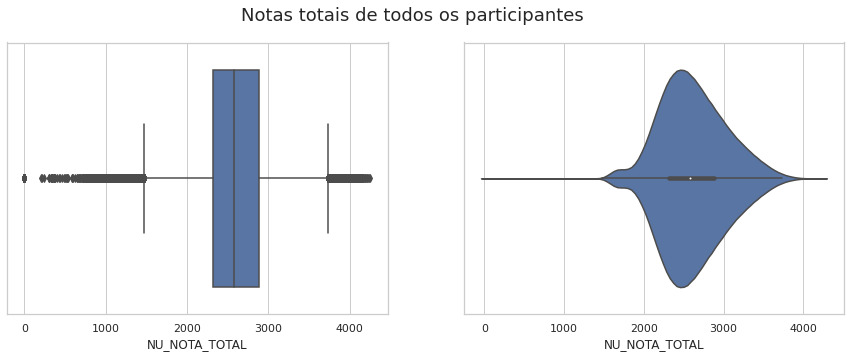

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax1 = sns.boxplot(data=df, x='NU_NOTA_TOTAL', ax=axes[0])
ax2 = sns.violinplot(data=df, x='NU_NOTA_TOTAL', ax=axes[1])
plt.suptitle('Notas totais de todos os participantes', fontsize=18)

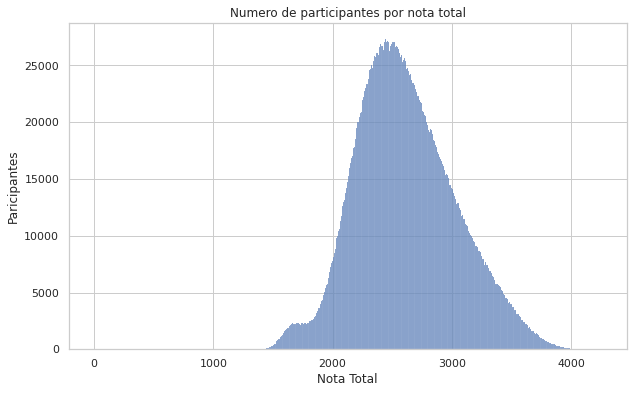

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='NU_NOTA_TOTAL')
plt.xlabel('Nota Total')
plt.ylabel('Paricipantes')
plt.title('Numero de participantes por nota total')
plt.show()

### 2. 2. 2. **Número de residentes no domicílio**

Há um número muito pequeno de amostras de inscrições onde 8 ou mais pessoas residem na mesma casa. Isso pode acabar enviesando a nossa análise. Para evitar esse problema, vamos agrupar os dados numa categoria "8+".

In [ ]:
df['Q005'] = df.apply(lambda row: row['Q005'] if row['Q005'] <= 7 else '8+', axis = 1)
df['Q005'] = df['Q005'].astype('category').cat.set_categories([1,2,3,4,5,6,7,'8+'], ordered=True)

In [ ]:
# Distribuição das respostas
sample_df = df.groupby(["Q005"])\
.agg(percentage=("Q005" , "count"))[["percentage"]]\
.apply(lambda x: 100*x/x.sum())\
.reset_index()

sample_df.sort_values('percentage', ascending=False)

,Q005,percentage
3,4,32.175881
2,3,25.510680
4,5,16.297311
1,2,12.669731
5,6,6.022075
0,1,2.787173
6,7,2.529405
7,8+,2.007744


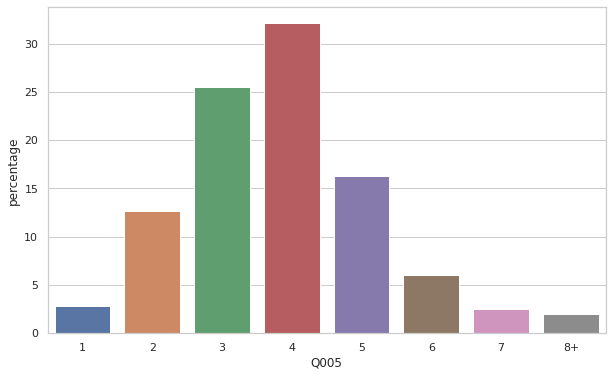

In [ ]:
plt.figure(figsize=(10,6))
ax1 = sns.barplot(data=sample_df, x='Q005', y='percentage')

## 2. 3. **Redução de dimensionalidade**
---
Para que não haja estouro da memória do Google Colab, bem como para selecionar as features relevantes para os estudos propostos, algumas colunas foram excluídas previamente:

*   Dados do município e UF de nascimento
*   Gabarito e respostas do participante
*   Dados de Atendimento Especializado
*   Dados de Recursos Especializados
*   Dados do município de aplicação

Foram mantidos os seguintes dados:

*   Dados do candidato (p. ex: cidade de residência, idade, estado civil, nacionalide, cor, etc)
*   Dados da escola
*   Presença e nota nas provas e na redação
*   Dados do questionário socio-econômico





---
### 2. 3. 1. **Ano da avaliação**
Como vimos previamente, a base de dados só possui registros do ano de 2019. Podemos, então remover esta coluna.


In [ ]:
df.drop('NU_ANO', axis=1, inplace=True)

### 2. 3. 2. **Número de inscrição**
O número de incrição é um identificador único para cada estudante e não serve para análises. Vamos removê-lo.

In [ ]:
df.drop('NU_INSCRICAO', axis=1, inplace=True)

### 2. 3. 3. **Estudantes eliminados na prova**
---
Existem 5 provas diferentes que devem ser completadas para que o estudante obtenha uma nota válida no Enem. Para as análises exploratórias, estamos focando nos resultados dos estudantes que completaram as 5 provas.

Portanto vamos selecionar do dataframe apenas alunos classificados e remover os dados de alunos eliminados (que faltaram a alguma prova, constam como eliminados ou não tem nota para alguma prova):

In [ ]:
classificados = (df["TP_PRESENCA_CN"] == 1) & \
                (df["TP_PRESENCA_CH"] == 1) & \
                (df["TP_PRESENCA_LC"] == 1) & \
                (df["TP_PRESENCA_MT"] == 1) & \
                (df["TP_STATUS_REDACAO"] == 1)
df = df.loc[classificados]
df.shape

(3596117, 67)

### 2. 3. 4. **Selecionando dados de interesse**
---
Com base nas perguntas que gostaremos de analisar, selecionamos as features de interesse:
* CO_MUNICIPIO_RESIDENCIA
* CO_UF_RESIDENCIA
* NU_IDADE
* TP_SEXO
* TP_ESTADO_CIVIL
* TP_COR_RACA
* TP_ST_CONCLUSAO
* TP_ANO_CONCLUIU
* TP_ESCOLA
* TP_ENSINO
* IN_TREINEIRO
* CO_ESCOLA
* CO_MUNICIPIO_ESC
* CO_UF_ES
* TP_DEPENDENCIA_ADM_ESC
* TP_LOCALIZACAO_ESC
* TP_LINGUA
* Q001
* Q002
* Q003
* Q004
* Q005
* Q006
* Q022
* Q024
* Q025
* NU_NOTA_TOTAL


In [ ]:
df_original = df.copy()

In [ ]:
features = [
            # 'CO_MUNICIPIO_RESIDENCIA'
            'CO_UF_RESIDENCIA',
            'NU_IDADE',
            'TP_SEXO',
            'TP_ESTADO_CIVIL',
            'TP_COR_RACA',
            'TP_ST_CONCLUSAO', 
            'TP_ANO_CONCLUIU', 
            'TP_ESCOLA', 
            'TP_ENSINO',
            'IN_TREINEIRO',
            'CO_ESCOLA',
            'CO_MUNICIPIO_ESC',
            'CO_UF_ESC',
            'TP_DEPENDENCIA_ADM_ESC',
            'TP_LOCALIZACAO_ESC',
            'TP_LINGUA',
            'Q001', 
            'Q002',
            'Q003',
            'Q004', 
            'Q005', 
            'Q006',
            'Q022',
            'Q024', 
            'Q025',
            'NU_NOTA_TOTAL'
            ]            
df = df_original[features].copy()

### 2. 3. 5. **Renomeando variáveis**

Algumas variáveis, como as perguntas do questionário socioeconômico não possuem nomes autoexplicativos. Vamos renomeá-los para ajudar em nossas análises.

In [ ]:
df.rename(columns={'Q001': 'EDU_PAI', 'Q002':'EDU_MAE', 'Q003': 'OCUP_PAI', 'Q004': 'OCUP_MAE' ,'Q005':'N_RESID','Q006':'RENDA', 'Q022': 'CELULAR', 'Q024': 'COMPUTADOR', 'Q025':'INTERNET'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3596117 entries, 3 to 5095264
Data columns (total 26 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   CO_UF_RESIDENCIA        category
 1   NU_IDADE                float64 
 2   TP_SEXO                 category
 3   TP_ESTADO_CIVIL         category
 4   TP_COR_RACA             category
 5   TP_ST_CONCLUSAO         category
 6   TP_ANO_CONCLUIU         category
 7   TP_ESCOLA               category
 8   TP_ENSINO               category
 9   IN_TREINEIRO            bool    
 10  CO_ESCOLA               category
 11  CO_MUNICIPIO_ESC        category
 12  CO_UF_ESC               category
 13  TP_DEPENDENCIA_ADM_ESC  category
 14  TP_LOCALIZACAO_ESC      category
 15  TP_LINGUA               category
 16  EDU_PAI                 category
 17  EDU_MAE                 category
 18  OCUP_PAI                category
 19  OCUP_MAE                category
 20  N_RESID                 category
 21  RENDA   

In [ ]:
df.head()

,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_LINGUA,EDU_PAI,EDU_MAE,OCUP_PAI,OCUP_MAE,N_RESID,RENDA,CELULAR,COMPUTADOR,INTERNET,NU_NOTA_TOTAL
3,17,25.0,F,1,1,1,4,1,NaN,False,NaN,NaN,NaN,NaN,NaN,1,C,E,B,D,4,E,D,B,B,2376.7
4,31,22.0,F,1,1,1,4,1,1.0,False,NaN,NaN,NaN,NaN,NaN,0,E,E,C,C,3,G,C,B,B,3196.8
5,51,37.0,M,2,2,1,13,1,NaN,False,NaN,NaN,NaN,NaN,NaN,0,B,B,C,B,7,E,E,B,B,3248.1
6,29,22.0,F,1,3,1,5,1,1.0,False,NaN,NaN,NaN,NaN,NaN,1,E,B,C,B,3,B,B,A,A,2674.9
9,35,17.0,M,1,1,2,0,2,1.0,False,NaN,NaN,NaN,NaN,NaN,0,E,E,B,B,5,F,C,B,B,2475.2


# 3. **Análise exploratória de dados - Performance de candidatos do ENEM 2019**
---
Agora faremos a análise exploratória do conjunto de dados *ENEM Microdados 2019* .

As estratégias utilizadas foram pensadas a partir das características do dataset que estamos trabalhando e também levando em consideração as perguntas e problemas que queremos analisar em relação aos dados:

* 1) Candidatos de escolas privadas tiveram melhores resultados no ENEM 2019? E os de escolas rurais ou urbanas?
* 2) Candidatos com acesso a internet em casa tiveram melhores resultados no ENEM 2019?
* 3) Existe diferença de desempenho entre candidatos do sexo masculino e do sexo feminino no ENEM 2019?
* 4) Existe diferença de desempenho entre candidatos de diferentes etnias no ENEM 2019?
* 5) Existe diferença de desempenho entre candidatos com diferentes estados civis no ENEM 2019?
* 6) Existem diferenças de desempenho entre candidatos com maior e menor renda familiar no ENEM 2019?
* 7) A idade dos candidatos influencia no seu desempenho no ENEM 2019?
* 8) Candidatos com pais com maior nível de educação tiveram melhores resultados no ENEM 2019?
* 9) A ocupação dos pais influencia no desempenho dos candidatos no ENEM 2019?
* 10) Um número maior de moradores na mesma residência afeta o desempenho do candidato no ENEM 2019?
* 11) Existe diferença de desempenho entre candidatos que terminaram o Ensino Médio em diferentes anos?
* 12) Candidatos residentes em estados diferentes tiveram diferença no desempenho no ENEM 2019? Como o estado de residência afeta a nota do candidato?


## 3. 1. **Desempenho vs. tipo de escola frequentada**

Os microdados do ENEM 2019 possuem uma feature que indica o tipo de escola frequentada pelo candidato  no ensino médio (Pública, privada ou no exterior). Nesta edição, não houve participantes de escolas do exterior.


In [ ]:
# Selecionando as escolas cuja dependência é privada
df.query('TP_DEPENDENCIA_ADM_ESC==4').groupby('TP_ESCOLA').count()

,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_LINGUA,EDU_PAI,EDU_MAE,OCUP_PAI,OCUP_MAE,N_RESID,RENDA,CELULAR,COMPUTADOR,INTERNET,NU_NOTA_TOTAL
TP_ESCOLA,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,33546,33545,33546,33546,33546,33546,33546,32253,33546,33546,33546,33546,33546,33546,33546,33546,33546,33546,33546,33546,33546,33546,33546,33546,33546
3,121602,121600,121602,121602,121602,121602,121602,120706,121602,121602,121602,121602,121602,121602,121602,121602,121602,121602,121602,121602,121602,121602,121602,121602,121602


In [ ]:
#Selecionando Sub DF para candidatos que responderam Tipo de escola do EM pública ou privada
df_escola = df.loc[:,['TP_ESCOLA','NU_NOTA_TOTAL']]

#Comparando a quantidade de alunos de cada tipo de escola que fizeram a prova
escola_count = df_escola.groupby("TP_ESCOLA").describe()['NU_NOTA_TOTAL'].reset_index()
escola_count.insert(1,'ESCOLA', ['Não respondeu', 'Pública', 'Privada'],True)
escola_count['%'] = round(escola_count['count']/df_escola.shape[0]*100,2)
escola_count.drop(columns='TP_ESCOLA',inplace=True)

escola_count.head()

,ESCOLA,count,mean,std,min,25%,50%,75%,max,%
0,Não respondeu,2419313.0,2638.615340,393.382215,200.0,2347.7,2590.8,2889.9,4216.4,67.28
1,Pública,970618.0,2553.507129,356.041354,300.0,2291.9,2518.3,2783.9,4231.3,26.99
2,Privada,206186.0,3026.395318,388.926838,1228.7,2757.3,3053.5,3316.7,4254.1,5.73


Acima, observamos que mais da metade dos candidatos não respondeu à pergunta. Vemos, também, que há quase 5x mais participantes da escola pública em comparação com a escola particular

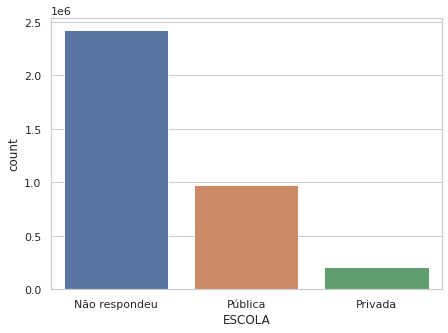

In [ ]:
plt.figure(figsize = (7,5))
sns.barplot(data = escola_count, x = 'ESCOLA', y = 'count', orient = 'v')
plt.show() 

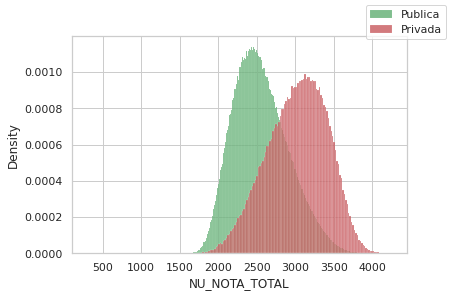

In [ ]:
#Colocando dois histplots para comparar os desempenhos da participantes de escolas públicas e privadas
fig, ax = plt.subplots()
sns.histplot(df_escola.query('TP_ESCOLA==2'), x='NU_NOTA_TOTAL', stat='density', ax=ax, color='g', label='Publica')
sns.histplot(df_escola.query('TP_ESCOLA==3'), x='NU_NOTA_TOTAL', stat='density', ax=ax, color='r', label='Privada')

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'upper right')

In [ ]:
df_escola.groupby('TP_ESCOLA').describe()

NU_NOTA_TOTAL                                                   \
                  count         mean         std     min     25%     50%   
TP_ESCOLA                                                                  
1             2419313.0  2638.615340  393.382215   200.0  2347.7  2590.8   
2              970618.0  2553.507129  356.041354   300.0  2291.9  2518.3   
3              206186.0  3026.395318  388.926838  1228.7  2757.3  3053.5   

                           
              75%     max  
TP_ESCOLA                  
1          2889.9  4216.4  
2          2783.9  4231.3  
3          3316.7  4254.1

Pelo histplot acima, já é possível ter uma noção de que os candidatos que fizeram ensino médio em escola particular tendem a ter notas maiores. Ao obervar as métricas, essa impresaão é confirmada. A média de notas dos candidatos concluintes do Ensino Médio em escola privada, por exemplo, é cerca de 20% maior do que a média dos canditatos que cursaram escolas públicas.

Também exploramos outros dados relacionados à escola para entender como se comporta a distribuição de notas dos alunos quando levamos em consideração a localização da escola (rural ou urbana) e a administração (privada, municipal, estadual ou federal).

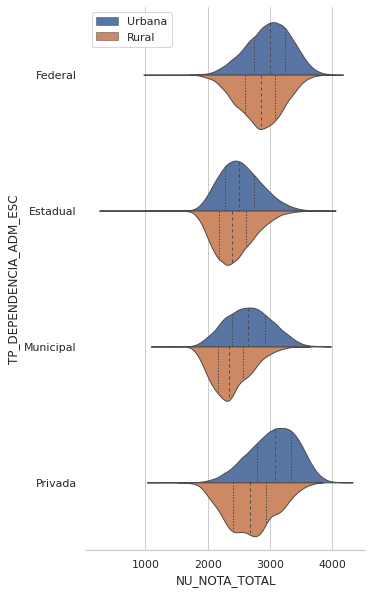

In [ ]:
plt.figure(figsize=(5, 10))
ax = sns.violinplot(data=df, y="TP_DEPENDENCIA_ADM_ESC", x="NU_NOTA_TOTAL", hue="TP_LOCALIZACAO_ESC",
               split=True, inner="quart", linewidth=1)
ax.set_yticklabels(['Federal', 'Estadual', 'Municipal', 'Privada'])
ax.legend(handles=ax.legend_.legendHandles, labels=['Urbana', 'Rural'])
sns.despine(left=True)

O violin plot acima joga luz no fato que que a diferença de desempenho nos candidatos de zonas urbana e rural é mais evidentes nas escolas municipais e privadas.

Além disso, podemos confirmar a tendência que escolas com administração privada possuem melhor desempenho geral.

## 3. 2. **Desempenho vs. acesso à internet**
O acesso à internet pode ser um fator importante para a facilitar o acesso à educação. Pensando nisso, vamos analisar se a resposta à pergunta sobre esse assunto no questionário socioeconômico do ENEM 2019 pode nos ajudar a confirmar essa crença.

In [ ]:
df.INTERNET.unique()

['B', 'A']
Categories (2, object): ['B', 'A']

In [ ]:
#Selecionando Sub DF para candidatos que responderam Q025
df_internet = df.loc[:,['INTERNET','NU_NOTA_TOTAL']]

#Comparando a quantidade de candidatos com e sem internet
internet_count = df_internet.groupby("INTERNET").describe()['NU_NOTA_TOTAL'].reset_index()

internet_count['INTERNET'] = ['Não', 'Sim']

# #calculando porcentagem
internet_count['count'] = internet_count['count']*100/sum(internet_count['count'])

internet_count.head()


,INTERNET,count,mean,std,min,25%,50%,75%,max
0,Não,20.702719,2436.814186,308.026861,240.0,2217.6,2405.0,2621.8,4062.9
1,Sim,79.297281,2690.370775,400.787204,200.0,2391.7,2650.0,2958.9,4254.1


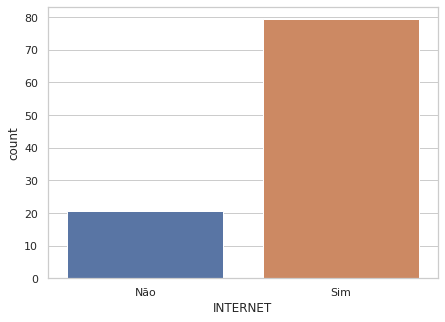

In [ ]:
plt.figure(figsize = (7,5))
sns.barplot(data = internet_count, x = 'INTERNET', y = 'count', orient = 'v')
plt.show() 

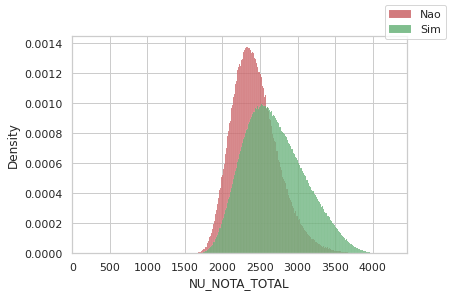

In [ ]:
#Colocando dois histplots para comparar os desempenhos
fig, ax = plt.subplots()
sns.histplot(df_internet.query('INTERNET=="A"'), x='NU_NOTA_TOTAL', stat='density', ax=ax, color='r', label='Nao')
sns.histplot(df_internet.query('INTERNET=="B"'), x='NU_NOTA_TOTAL', stat='density', ax=ax, color='g', label='Sim')

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'upper right')

In [ ]:
df_internet.groupby('INTERNET').describe()

NU_NOTA_TOTAL                                                  \
                 count         mean         std    min     25%     50%   
INTERNET                                                                 
A             744494.0  2436.814186  308.026861  240.0  2217.6  2405.0   
B            2851623.0  2690.370775  400.787204  200.0  2391.7  2650.0   

                          
             75%     max  
INTERNET                  
A         2621.8  4062.9  
B         2958.9  4254.1

Apesar do grande desbalanço das respostas -  80% dos candidatos responderam que possuem acesso à internet -  é visivel que existe uma tendência daqueles com acesso à rede mundial de computadores em obterem notas mais elevadas. O 3º quartil, por exemplo, tem diferença mais de 300 pontos.

In [ ]:
dummies = pd.get_dummies(df[['NU_NOTA_TOTAL','INTERNET']])
dummies.corr()['NU_NOTA_TOTAL'].sort_values(ascending=False)

NU_NOTA_TOTAL    1.000000
INTERNET_B       0.258808
INTERNET_A      -0.258808
Name: NU_NOTA_TOTAL, dtype: float64

## 3. 3. **Desempenho vs. sexo**

Para tentarmos responder se homens tendem a tirar notas melhores que mulheres no ENEM 2019, iremos analisar a feature "TP_SEXO" em que os candidatos se declaram do sexo Masculino ou Feminino.

In [ ]:
df.TP_SEXO.unique()

['F', 'M']
Categories (2, object): ['F', 'M']

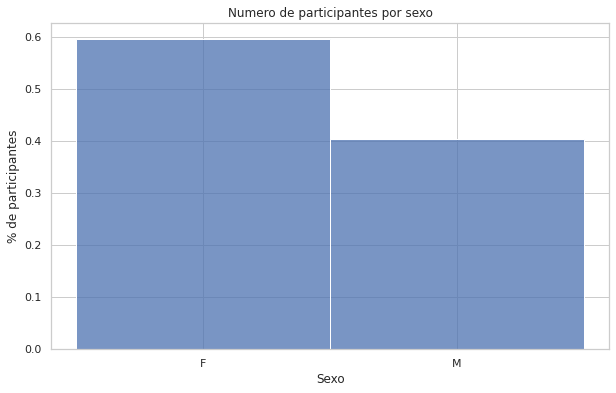

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TP_SEXO', stat="probability")
plt.xlabel('Sexo')
plt.ylabel('% de participantes')
plt.title('Numero de participantes por sexo')
plt.show()

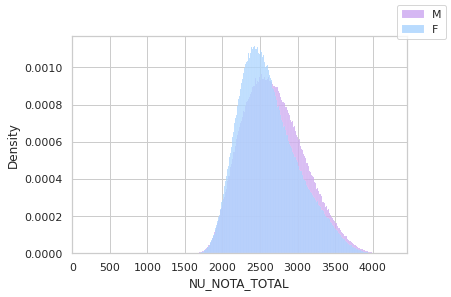

In [ ]:
#Selecionando Sub DF para candidatos que responderam Tipo de sexo
df_TP_SEXO = df.loc[:,['TP_SEXO','NU_NOTA_TOTAL']]

#Colocando dois histplots para comparar os desempenhos
fig, ax = plt.subplots()
sns.histplot(df_TP_SEXO.query('TP_SEXO=="M"'), x='NU_NOTA_TOTAL', stat='density', ax=ax, color='xkcd:lavender', label='M')
sns.histplot(df_TP_SEXO.query('TP_SEXO=="F"'), x='NU_NOTA_TOTAL', stat='density', ax=ax, color='xkcd:baby blue', label='F')

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'upper right')

In [ ]:
df_TP_SEXO.groupby('TP_SEXO').describe()

NU_NOTA_TOTAL                                                          \
                count         mean         std    min     25%     50%     75%   
TP_SEXO                                                                         
F           2143138.0  2610.091121  388.477186  240.0  2324.7  2555.4  2851.0   
M           1452979.0  2678.862708  405.678726  200.0  2376.1  2646.2  2951.3   

                 
            max  
TP_SEXO          
F        4213.5  
M        4254.1

Observando o histograma de notas para participantes do sexo masculino e feminino, podemos observar que há muita semelhança na distribuição, sendo que no sexo masculino há uma média levemente maior e um desvio padrão também um pouco maior, o que leva a crer que a nota deles tende a ser levemente superior.

In [ ]:
dummies = pd.get_dummies(df[['NU_NOTA_TOTAL','TP_SEXO']])
dummies.corr()['NU_NOTA_TOTAL'].sort_values(ascending=False)

NU_NOTA_TOTAL    1.000000
TP_SEXO_M        0.085014
TP_SEXO_F       -0.085014
Name: NU_NOTA_TOTAL, dtype: float64

## 3. 4. **Desempenho vs. cor/raça**

Para analisar como a cor (ou raça) se comporta em relação à nota total, iremos analisar a feature "TP_COR_RACA" em que cada candidato pode se autodeclarar pertencente a alguma cor/raça. As opções são: Não declarado, Branca, Preta, Parda, Amarela, Indígena

In [ ]:
df['TP_COR_RACA'].unique()

[1, 2, 3, 4, 5, 0]
Categories (6, int64): [1, 2, 3, 4, 5, 0]

In [ ]:
#Selecionando Sub DF para raça de candidatos
df_raca = df.loc[:,['TP_COR_RACA','NU_NOTA_TOTAL']]
df_raca['TP_COR_RACA'].replace({0:"Não declarado", 1:"Branca",2:"Preta",3:"Parda", 4:"Amarela", 5:"Indigena"}, inplace=True)
df_raca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3596117 entries, 3 to 5095264
Data columns (total 2 columns):
 #   Column         Dtype  
---  ------         -----  
 0   TP_COR_RACA    object 
 1   NU_NOTA_TOTAL  float64
dtypes: float64(1), object(1)
memory usage: 82.3+ MB


In [ ]:
#Comparando a quantidade de candidatos por raça
raca_count = df_raca.groupby('TP_COR_RACA').count()['NU_NOTA_TOTAL'].reset_index()
raca_count = raca_count[1:].sort_values(by = "NU_NOTA_TOTAL", ascending = False)
raca_count.rename(columns={'TP_COR_RACA':'COR/RACA', 'NU_NOTA_TOTAL':'Count'}, inplace=True);

raca_percent = round(raca_count.iloc[:,1]/df_raca.shape[0]*100,2)

raca_count.insert(2,"%",raca_percent,True)
#raca_count.set_index('', inplace=True)
raca_count.head()

,COR/RACA,Count,%
4,Parda,1636663,45.51
1,Branca,1347877,37.48
5,Preta,438407,12.19
3,Não declarado,70673,1.97
2,Indigena,20196,0.56


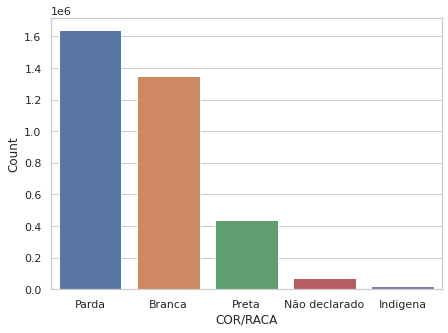

In [ ]:
plt.figure(figsize = (7,5))
sns.barplot(data = raca_count, x = 'COR/RACA', y = 'Count', orient = 'v')
plt.show() 

Podemos observar que Brancos e Pardos são a maioria dos participantes (mais de 3 milhões de participantes). A parcela indígena, por outro lado, é a menor com cerca de 20 mil participantes.

In [ ]:
#Comparando a média de notas de candidatos por raça
media_raca = df_raca.groupby('TP_COR_RACA').mean()['NU_NOTA_TOTAL'].reset_index()
media_raca = media_raca[1:].sort_values(by = "NU_NOTA_TOTAL", ascending = False)
media_raca.head(10)

,TP_COR_RACA,NU_NOTA_TOTAL
1,Branca,2761.897765
3,Não declarado,2676.634494
4,Parda,2564.117926
5,Preta,2537.136080
2,Indigena,2422.568459


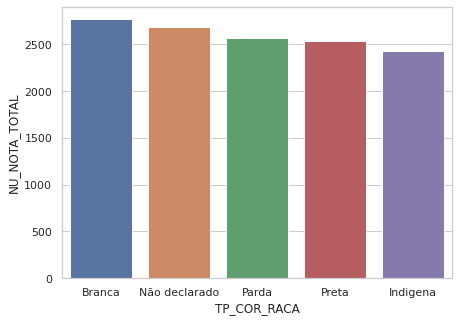

In [ ]:
plt.figure(figsize = (7,5))
sns.barplot(data = media_raca, x = 'TP_COR_RACA', y = 'NU_NOTA_TOTAL', orient = 'v');

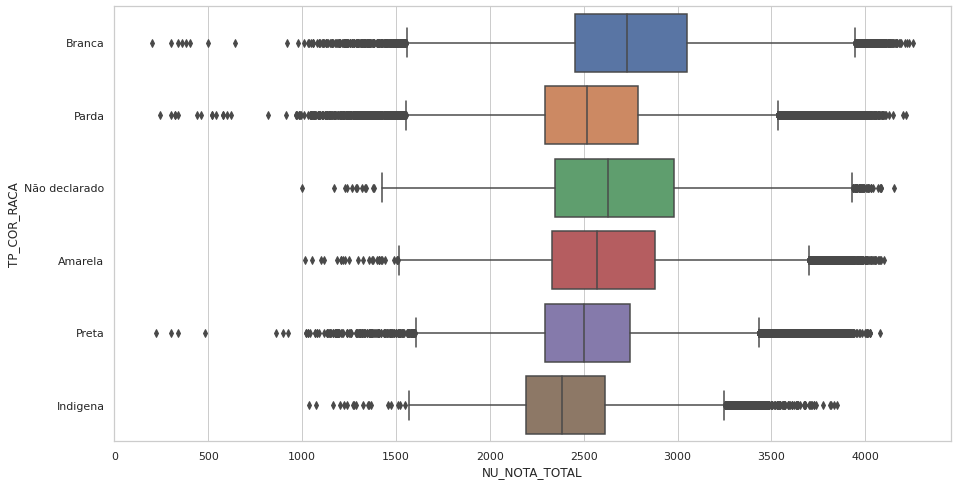

In [ ]:
#Colocando boxplots para comparar os desempenhos
plt.figure(figsize=(15,8))
df_raca = df_raca.sort_values(by = 'NU_NOTA_TOTAL', ascending = False)
sns.boxplot(data=df_raca, x='NU_NOTA_TOTAL', y='TP_COR_RACA')

Apesar do aparente equilíbro das notas médias, ao analisarmos o boxplot podemos analisar que existe uma distribuição mais à esquerda para candidatos pardos em relação ao box plot para candidados brancos, que são os dois grandes grupos de cores. Os indígenas também têm uma distribuição consideralmente menor, mas, nesse caso, devemos ponderar que a diferença de indivpiduos em cada grupo difere consideravelmente, sendo necessária uma análise mais cuidadosa.

In [ ]:
dummies = pd.get_dummies(df[['NU_NOTA_TOTAL','TP_COR_RACA']])
dummies.corr()['NU_NOTA_TOTAL'].sort_values(ascending=False)

NU_NOTA_TOTAL    1.000000
TP_COR_RACA_1    0.241911
TP_COR_RACA_0    0.013824
TP_COR_RACA_4   -0.003133
TP_COR_RACA_5   -0.040762
TP_COR_RACA_2   -0.094563
TP_COR_RACA_3   -0.169821
Name: NU_NOTA_TOTAL, dtype: float64

## 3. 5. **Desempenho vs. estado civil**


In [ ]:
#Selecionando Sub DF para estado civil
df_estado_civil = df.loc[:,['TP_ESTADO_CIVIL','NU_NOTA_TOTAL']]
df_estado_civil['TP_ESTADO_CIVIL'].replace({0:"Não declarado", 1:"Solteiro",2:"Casado",3:"Divorciado", 4:"Viúvo"}, inplace=True)
df_estado_civil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3596117 entries, 3 to 5095264
Data columns (total 2 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TP_ESTADO_CIVIL  object 
 1   NU_NOTA_TOTAL    float64
dtypes: float64(1), object(1)
memory usage: 82.3+ MB


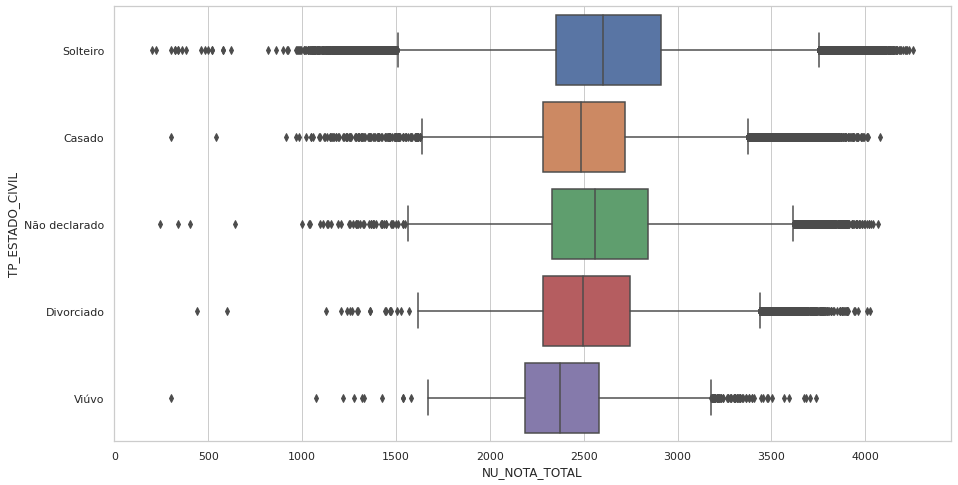

In [ ]:
#Colocando boxplots para comparar os desempenhos
plt.figure(figsize=(15,8))
df_estado_civil = df_estado_civil.sort_values(by = 'NU_NOTA_TOTAL', ascending = False)
sns.boxplot(data=df_estado_civil, x='NU_NOTA_TOTAL', y='TP_ESTADO_CIVIL')

## 3. 6. **Desempenho vs. renda**

A ideia dessa análise é verificar se há indícios de que uma maior renda familiar possa se refletir em notas maiores já que famílias mais ricas tendem a acessar melhores serviços de educação privada, por exemplo. Começamos analisando as respostas para essa pergunta (feature "RENDA")

In [ ]:
df['RENDA'].unique()

['E', 'G', 'B', 'F', 'C', ..., 'Q', 'M', 'P', 'L', 'N']
Length: 17
Categories (17, object): ['E', 'G', 'B', 'F', ..., 'M', 'P', 'L', 'N']

In [ ]:
#Selecionando Sub DF para renda de candidatos
df_renda = df.loc[:,['RENDA','NU_NOTA_TOTAL']]
df_renda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3596117 entries, 3 to 5095264
Data columns (total 2 columns):
 #   Column         Dtype   
---  ------         -----   
 0   RENDA          category
 1   NU_NOTA_TOTAL  float64 
dtypes: category(1), float64(1)
memory usage: 58.3 MB


In [ ]:
#Comparando a quantidade de candidatos por faixa de renda
renda_count = df_renda.groupby('RENDA').count()['NU_NOTA_TOTAL'].reset_index()
renda_count['RENDA'].replace({'A':"Sem renda", 'B':"Até R$ 998,00",'C':"R$ 998,01 a R$ 1.497,00",
                          'D':"R$ 1.497,01 a R$1.996,00", 'E':"R$1.996,01 a R$2.495,00",
                          'F':"R$ 2.495,01 a R$2.994,00", 'G':"R$2.994,01 a R$3.992,00",
                          'H':"R$ 3.992,01 a R$4.990,00", 'I':"R$4.990,01 a R$5.988,00",
                          'J':"R$ 5.988,01 a R$6.986,00", 'K':"R$6.986,01 a R$7.984,00",
                          'L':"R$ 7.984,01 a R$8.982,00", 'M':"R$8.982,01 a R$9.980,00",
                          'N':"R$ 9.980,01 a R$11.976,00", 'O':"R$11.976,01 a R$14.970,00",
                          'P':"R$14.970,01 a R$19.960,00", 'Q':"Mais de R$19.960,00"}, inplace=True)
renda_count.sort_values(by='RENDA', ascending=True)
renda_count.rename(columns={'NU_NOTA_TOTAL': 'count'}, inplace=True)

renda_count['%'] = round(renda_count['count']*100/df_renda.shape[0],2)
renda_count

,RENDA,count,%
0,Sem renda,149205,4.15
1,"Até R$ 998,00",851554,23.68
2,"R$ 998,01 a R$ 1.497,00",877046,24.39
3,"R$ 1.497,01 a R$1.996,00",348379,9.69
4,"R$1.996,01 a R$2.495,00",339004,9.43
5,"R$ 2.495,01 a R$2.994,00",169235,4.71
6,"R$2.994,01 a R$3.992,00",230941,6.42
7,"R$ 3.992,01 a R$4.990,00",152813,4.25
8,"R$4.990,01 a R$5.988,00",116600,3.24
9,"R$ 5.988,01 a R$6.986,00",66074,1.84


A seguir, plotamos um gráfico de renda por quantidade de respondentes para termos uma noção de como a renda se distribui. Podemos observar que a parcela de participantes com renda de até R$ 1.497,00 (ou 1,5 salário mínimo) compreende a maioria absoluta.

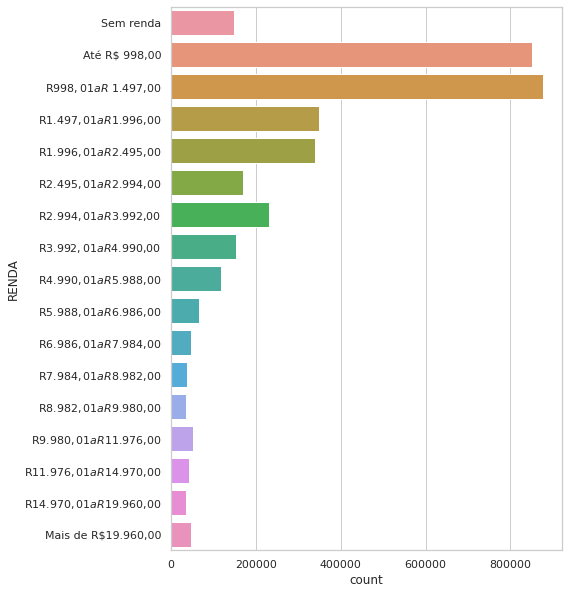

In [ ]:
plt.figure(figsize = (7,10))
sns.barplot(data = renda_count, x = 'count', y = 'RENDA', orient = 'h')
plt.show() 

In [ ]:
#Comparando a média de notas de candidatos por faixa de renda
media_renda = df_renda.groupby('RENDA').mean()['NU_NOTA_TOTAL'].reset_index()
media_renda.sort_values(by='RENDA', ascending=True)
media_renda.head(10)


,RENDA,NU_NOTA_TOTAL
0,A,2403.907442
1,B,2446.672733
2,C,2541.891784
3,D,2632.020885
4,E,2669.223059
5,F,2748.237862
6,G,2787.867522
7,H,2868.438058
8,I,2909.982341
9,J,2961.479022


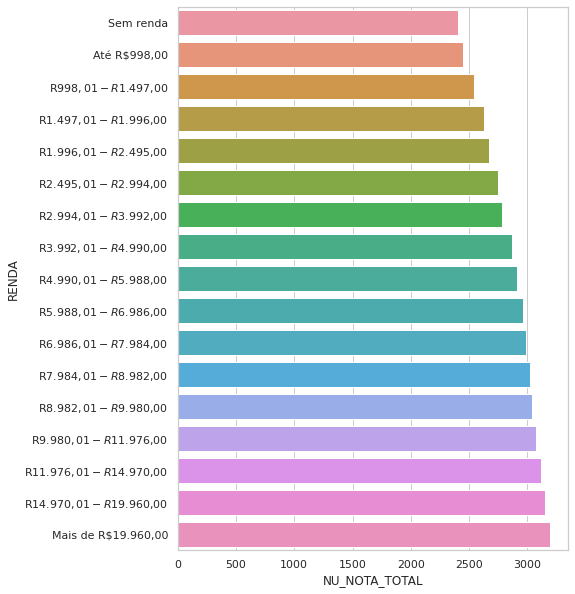

In [ ]:
media_renda['RENDA'].replace({'A':"Sem renda", 'B':"Até R$998,00",'C':"R$998,01 - R$1.497,00",
                          'D':"R$1.497,01 - R$1.996,00", 'E':"R$1.996,01 - R$2.495,00",
                          'F':"R$2.495,01 - R$2.994,00", 'G':"R$2.994,01 - R$3.992,00",
                          'H':"R$3.992,01 - R$4.990,00", 'I':"R$4.990,01 - R$5.988,00",
                          'J':"R$5.988,01 - R$6.986,00", 'K':"R$6.986,01 - R$7.984,00",
                          'L':"R$7.984,01 - R$8.982,00", 'M':"R$8.982,01 - R$9.980,00",
                          'N':"R$9.980,01 - R$11.976,00", 'O':"R$11.976,01 - R$14.970,00",
                          'P':"R$14.970,01 - R$19.960,00", 'Q':"Mais de R$19.960,00"}, inplace=True)
plt.figure(figsize = (7,10))
sns.barplot(data = media_renda, x = 'NU_NOTA_TOTAL', y = 'RENDA', orient = 'h')
plt.show() 

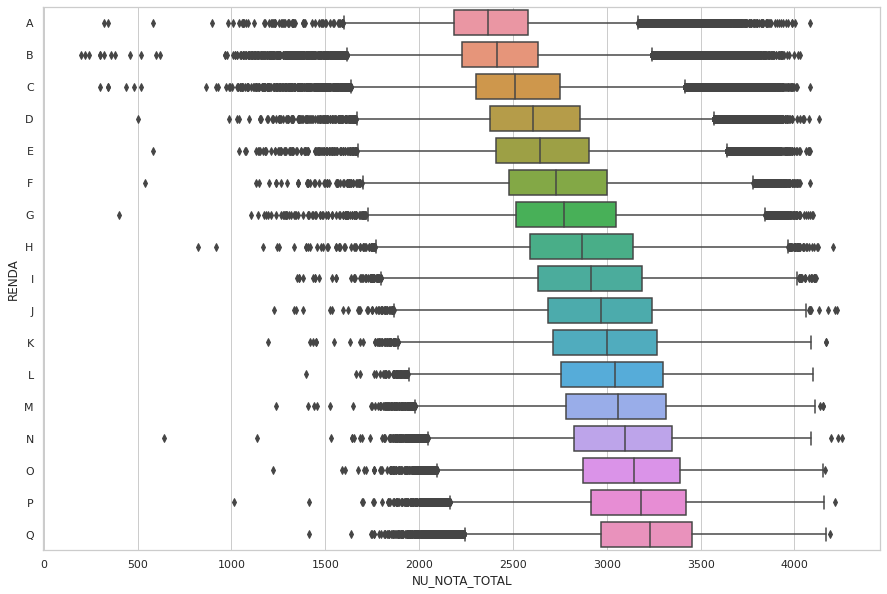

In [ ]:
#Colocando boxplots para comparar os desempenhos
plt.figure(figsize=(15, 10))
df_renda = df_renda.sort_values(by = 'RENDA', ascending = False)
sns.boxplot(data=df_renda, x='NU_NOTA_TOTAL', y='RENDA')

Acima, são apresentados plots da nota total média por segmento de renda e um boxplot também para cada faixa de renda. Ao analisarmos os gráficos fica mais claro que há relação entre esses dados.

In [ ]:
dummies = pd.get_dummies(df[['NU_NOTA_TOTAL','RENDA']])
dummies.corr()['NU_NOTA_TOTAL'].sort_values(ascending=False)

NU_NOTA_TOTAL    1.000000
RENDA_Q          0.160221
RENDA_N          0.132479
RENDA_P          0.130405
RENDA_O          0.130388
RENDA_I          0.125483
RENDA_H          0.122359
RENDA_J          0.111531
RENDA_K          0.102133
RENDA_M          0.100941
RENDA_G          0.098985
RENDA_L          0.098186
RENDA_F          0.061783
RENDA_E          0.025475
RENDA_D         -0.004832
RENDA_A         -0.122630
RENDA_C         -0.137331
RENDA_B         -0.268305
Name: NU_NOTA_TOTAL, dtype: float64

## 3. 7. **Desempenho vs. idade dos participantes**

Para analisar se a idade dos participantes do ENEM 2019, iremos analisar a feature "NU_IDADE" que contém a idade do participante. Participantes menores de 10 anos e maiores de 100 anos são agrupados nessas duas idades. Espera-se entretanto que a maioria dos participantes esteja em idade concluinte do ensino médio, ou seja, entre 16 e 20 anos - o que de fato é evidenciado pelo histograma abaixo: mais de 60% dos participantes está nessa faixa etária.

In [ ]:
df.value_counts(subset=['NU_IDADE']).head(10)

NU_IDADE
17.0        726227
18.0        691040
19.0        418348
20.0        277687
16.0        271387
21.0        186465
22.0        143676
23.0        111513
24.0         89884
25.0         71412
dtype: int64

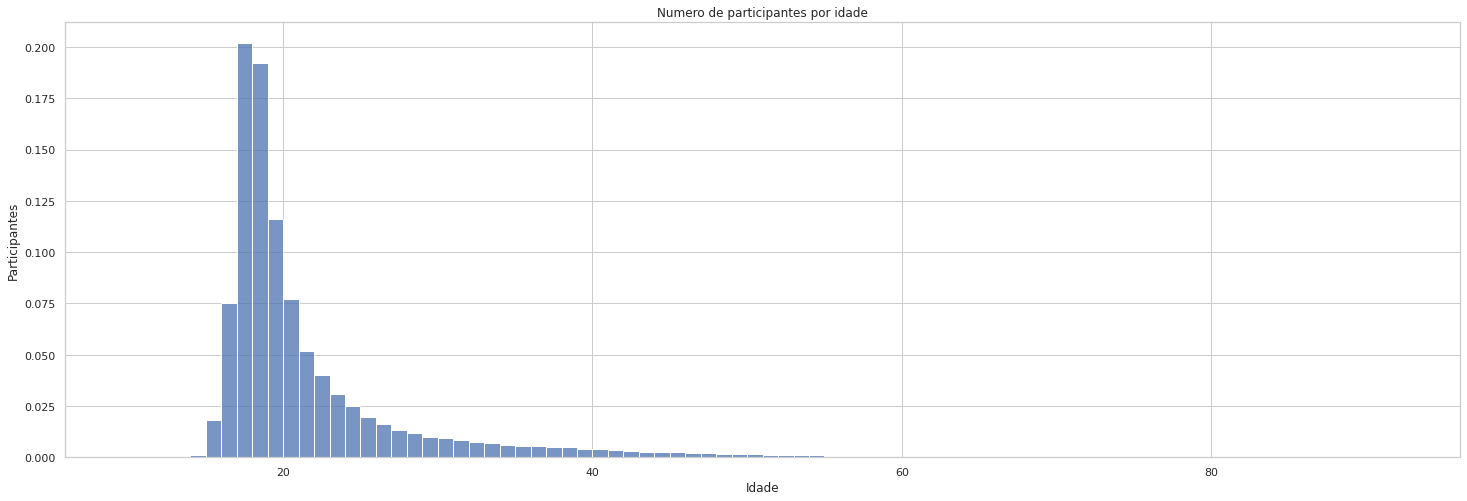

In [ ]:
plt.figure(figsize=(25, 8))
sns.histplot(data=df, x='NU_IDADE', stat="probability", binwidth=1)
plt.xlabel('Idade')
plt.ylabel('Participantes')
plt.title('Numero de participantes por idade')
plt.show()

In [ ]:
idades = {
    'Até 18':{'count':round(df.query('NU_IDADE<=18').shape[0]),'%':round(df.query('NU_IDADE<=18').shape[0]/df.shape[0]*100,2)},
    '19 a 23':{'count':round(df.query('NU_IDADE>18 & NU_IDADE<=23').shape[0]),'%':round(df.query('NU_IDADE>18 & NU_IDADE<=23').shape[0]/df.shape[0]*100,2)},
    '23 a 29':{'count':round(df.query('NU_IDADE>23 & NU_IDADE<=30').shape[0]),'%':round(df.query('NU_IDADE>23 & NU_IDADE<=30').shape[0]/df.shape[0]*100,2)},
    '30 a 40':{'count':round(df.query('NU_IDADE>30 & NU_IDADE<=40').shape[0]),'%':round(df.query('NU_IDADE>30 & NU_IDADE<=40').shape[0]/df.shape[0]*100,2)},
    '40+':{'count':round(df.query('NU_IDADE>40').shape[0]),'%':round(df.query('NU_IDADE>40').shape[0]/df.shape[0]*100,2)},
}
pd.DataFrame(idades)

,Até 18,19 a 23,23 a 29,30 a 40,40+
count,1757579.00,1137689.00,378715.00,208040.00,114034.00
%,48.87,31.64,10.53,5.79,3.17


In [ ]:
df[['NU_IDADE', 'NU_NOTA_TOTAL']].corr()

,NU_IDADE,NU_NOTA_TOTAL
NU_IDADE,1.000000,-0.135668
NU_NOTA_TOTAL,-0.135668,1.000000


## 3. 8. **Desempenho dos participantes vs. escolaridade dos pais**

Para a análise da escolaridade dos pais, devemos considerar que as respostas estão ordenadas de A (nunca estudou) até G (completou pós-graduação) de forma crescente e a letra H corresponde à alternativa "não sei". Primeiramente, vamos analisar a quantidade de participantes que responderam a cada alternativa. Para isso, vamos extrair as features "EDU_PAI" e "EDU_MAE", juntando em um um único dataframe com a feature "EDU" e diferenciando se o dado é referente à educação da mãe ou do pai por uma feature "pai". Isso nos possibilitará criar um plot distribução mais facilmente utilizando o parâmtreo "hue"

In [ ]:
educount = {
    'maecount': {'Nunca Estudou':round(df.query('EDU_MAE=="A"').shape[0]),
              'Não completou EF I':round(df.query('EDU_MAE=="B"').shape[0]),
              'Não completou EF II':round(df.query('EDU_MAE=="C"').shape[0]),
              'Completou EF':round(df.query('EDU_MAE=="D"').shape[0]),
              'Completou EM':round(df.query('EDU_MAE=="E"').shape[0]),
              'Completou Faculdade':round(df.query('EDU_MAE=="F"').shape[0]),
              'Completou Pós':round(df.query('EDU_MAE=="G"').shape[0]),
              'Não sabe':round(df.query('EDU_MAE=="H"').shape[0])},
    'mae%' : {'Nunca Estudou':round(df.query('EDU_MAE=="A"').shape[0]*100/df.shape[0],2),
              'Não completou EF I':round(df.query('EDU_MAE=="B"').shape[0]*100/df.shape[0],2),
              'Não completou EF II':round(df.query('EDU_MAE=="C"').shape[0]*100/df.shape[0],2),
              'Completou EF':round(df.query('EDU_MAE=="D"').shape[0]*100/df.shape[0],2),
              'Completou EM':round(df.query('EDU_MAE=="E"').shape[0]*100/df.shape[0],2),
              'Completou Faculdade':round(df.query('EDU_MAE=="F"').shape[0]*100/df.shape[0],2),
              'Completou Pós':round(df.query('EDU_MAE=="G"').shape[0]*100/df.shape[0],2),
              'Não sabe':round(df.query('EDU_MAE=="H"').shape[0]*100/df.shape[0],2)},
    'paicount': {'Nunca Estudou':round(df.query('EDU_PAI=="A"').shape[0]),
              'Não completou EF I':round(df.query('EDU_PAI=="B"').shape[0]),
              'Não completou EF II':round(df.query('EDU_PAI=="C"').shape[0]),
              'Completou EF':round(df.query('EDU_PAI=="D"').shape[0]),
              'Completou EM':round(df.query('EDU_PAI=="E"').shape[0]),
              'Completou Faculdade':round(df.query('EDU_PAI=="F"').shape[0]),
              'Completou Pós':round(df.query('EDU_PAI=="G"').shape[0]),
              'Não sabe':round(df.query('EDU_PAI=="H"').shape[0])},
    'pai%' : {'Nunca Estudou':round(df.query('EDU_PAI=="A"').shape[0]*100/df.shape[0],2),
              'Não completou EF I':round(df.query('EDU_PAI=="B"').shape[0]*100/df.shape[0],2),
              'Não completou EF II':round(df.query('EDU_PAI=="C"').shape[0]*100/df.shape[0],2),
              'Completou EF':round(df.query('EDU_PAI=="D"').shape[0]*100/df.shape[0],2),
              'Completou EM':round(df.query('EDU_PAI=="E"').shape[0]*100/df.shape[0],2),
              'Completou Faculdade':round(df.query('EDU_PAI=="F"').shape[0]*100/df.shape[0],2),
              'Completou Pós':round(df.query('EDU_PAI=="G"').shape[0]*100/df.shape[0],2),
              'Não sabe':round(df.query('EDU_PAI=="H"').shape[0]*100/df.shape[0],2)},
    }
df_edu = pd.DataFrame(educount)
df_edu.columns = pd.MultiIndex.from_arrays([['mae','mae','pai','pai'],['count','%','count','%']])
df_edu

mae            pai       
                       count      %   count      %
Nunca Estudou         113323   3.15  175466   4.88
Não completou EF I    529214  14.72  725030  20.16
Não completou EF II   455175  12.66  499651  13.89
Completou EF          461104  12.82  421445  11.72
Completou EM         1206143  33.54  985295  27.40
Completou Faculdade   410549  11.42  304799   8.48
Completou Pós         328972   9.15  191529   5.33
Não sabe               91637   2.55  292902   8.14

In [ ]:
mae=pd.DataFrame(df.loc[:,'EDU_MAE']).rename(columns={"EDU_MAE":"EDU"}).reset_index()
mae['pai'] = 'Mae'
pai=pd.DataFrame(df.loc[:,'EDU_PAI']).rename(columns={"EDU_PAI":"EDU"}).reset_index()
pai['pai'] = 'Pai'

edu = pd.concat([pai,mae]);
edu.sort_values(by='EDU', ascending=True, inplace=True)
edu['EDU'].replace({'A':'Nunca Estudou',
              'B':'Não completou EF I',
              'C':'Não completou EF II',
              'D':'Completou EF',
              'E':'Completou EM',
              'F':'Completou Faculdade',
              'G':'Completou Pós',
              'H':'Não sabe'}, inplace=True);

edu.head()

,index,EDU,pai
2492714,3400581,Nunca Estudou,Pai
3563341,5034558,Nunca Estudou,Pai
1704395,2314363,Nunca Estudou,Mae
3563343,5034563,Nunca Estudou,Pai
1686293,2288735,Nunca Estudou,Pai


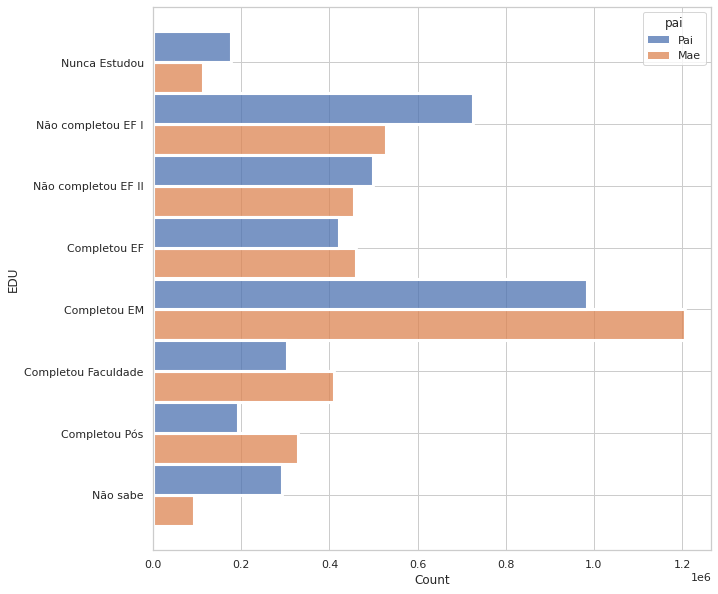

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(data= edu, y='EDU', hue='pai', multiple="dodge")


Pelo que podemos observar no gráfico acima, de maneira geral, as mães tendem a ter um nível maior de escolaridade que os pais. As alternativas A, B e C (Nunca estudou e somente ensino fundamental) foram mais respondidas para pais do que para mães, enquanto as alternativas E, F e G (Ensino médio completo, Superior e Pós graduação) são mais frequentes nas mães que nos pais.

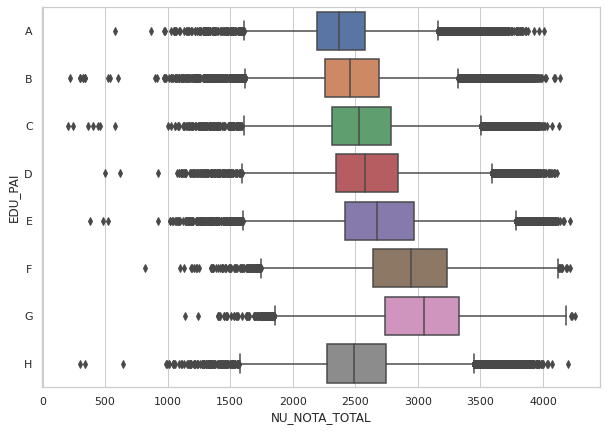

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='NU_NOTA_TOTAL', y='EDU_PAI')

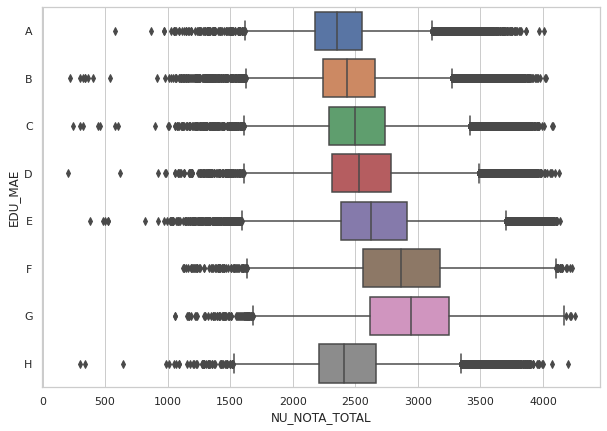

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='NU_NOTA_TOTAL', y='EDU_MAE')

In [ ]:
dummies = pd.get_dummies(df[['NU_NOTA_TOTAL','EDU_PAI', 'EDU_MAE']])
dummies.corr()['NU_NOTA_TOTAL'].sort_values(ascending=False)

NU_NOTA_TOTAL    1.000000
EDU_MAE_G        0.233808
EDU_PAI_G        0.228957
EDU_PAI_F        0.227553
EDU_MAE_F        0.210005
EDU_PAI_E        0.103656
EDU_MAE_E        0.042370
EDU_PAI_D       -0.026527
EDU_MAE_D       -0.070094
EDU_MAE_H       -0.072114
EDU_PAI_C       -0.073707
EDU_PAI_H       -0.082622
EDU_MAE_C       -0.105934
EDU_MAE_A       -0.116666
EDU_PAI_A       -0.133956
EDU_MAE_B       -0.180061
EDU_PAI_B       -0.188275
Name: NU_NOTA_TOTAL, dtype: float64

Analisando as distribuições, pode-se verificar que há uma relação entre maiores níveis de escolaridades dos pais e um melhor desempenho do participante do ENEM 2019, principalmente nos níveis F e G que correspondem ao ensino superior e pós-graduação.

## 3. 9. **Desempenho dos participantes vs. ocupação dos pais**

Para a análise da ocupação dos pais, devemos considerar que as respostas estão ordenadas de A (trabalhadores rurais) até F (profissionais liberais/funcionários públicos com remuneração alta) de forma crescente e a letra G corresponde à alternativa "não sei". Primeiramente, vamos analisar a quantidade de participantes que responderam a cada alternativa. Para isso, vamos extrair as features "OCUP_PAI" e "OCUP_MAE", juntando em um um único dataframe com a feature "OCUP" e diferenciando se o dado é referente à ocupação da mãe ou do pai por uma feature "pai". Isso nos possibilitará criar um plot distribução mais facilmente utilizando o parâmtreo "hue"

In [ ]:
mae=pd.DataFrame(df.loc[:,'OCUP_MAE']).rename(columns={"OCUP_MAE":"OCUP"}).reset_index()
mae['pai'] = 'Mae'
pai=pd.DataFrame(df.loc[:,'OCUP_PAI']).rename(columns={"OCUP_PAI":"OCUP"}).reset_index()
pai['pai'] = 'Pai'

edu = pd.concat([pai,mae]);

edu.head()

,index,OCUP,pai
0,3,B,Pai
1,4,C,Pai
2,5,C,Pai
3,6,C,Pai
4,9,B,Pai


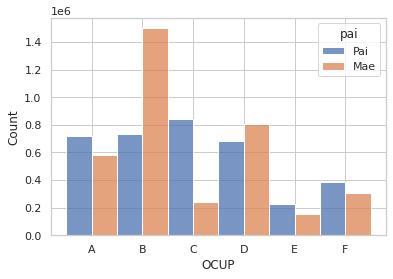

In [ ]:
sns.histplot(data=edu, x='OCUP', hue='pai', multiple="dodge")

Pelo que podemos observar no gráfico acima, de maneira geral, as mães tendem a ter um nível maior de escolaridade que os pais. As alternativas A, B e C (Nunca estudou e somente ensino fundamental) foram mais respondidas para pais do que para mães, enquanto as alternativas E, F e G (Ensino médio completo, Superior e Pós graduação) são mais frequentes nas mães que nos pais.

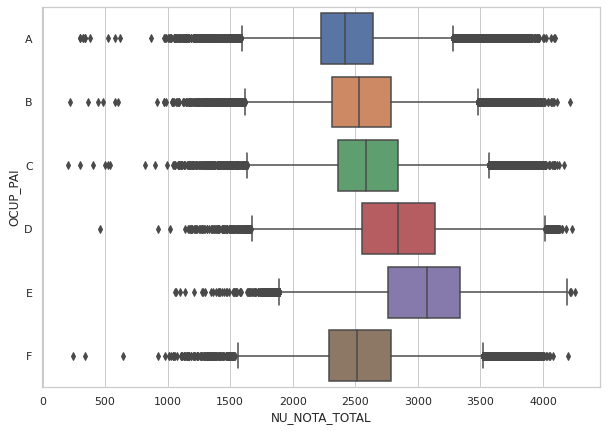

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='NU_NOTA_TOTAL', y='OCUP_PAI')

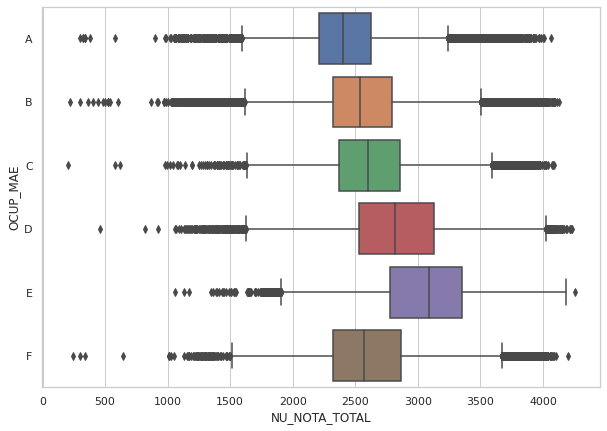

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='NU_NOTA_TOTAL', y='OCUP_MAE')

In [ ]:
dummies = pd.get_dummies(df[['NU_NOTA_TOTAL','OCUP_PAI', 'OCUP_MAE']])
dummies.corr()['NU_NOTA_TOTAL'].sort_values(ascending=False)

NU_NOTA_TOTAL    1.000000
OCUP_PAI_E       0.262940
OCUP_MAE_D       0.261153
OCUP_PAI_D       0.256934
OCUP_MAE_E       0.223387
OCUP_MAE_C      -0.007749
OCUP_MAE_F      -0.022391
OCUP_PAI_C      -0.032322
OCUP_PAI_F      -0.070266
OCUP_PAI_B      -0.090860
OCUP_MAE_B      -0.130543
OCUP_MAE_A      -0.222838
OCUP_PAI_A      -0.232023
Name: NU_NOTA_TOTAL, dtype: float64

Analisando as distribuições, pode-se verificar que há uma relação entre ocupações mais bem remuneradas dos pais e um melhor desempenho do participante do ENEM 2019, principalmente nos níveis D e E que correspondem às profissões onde se encontram profissionais liberais, empresários e funcionários públicos.

## 3. 10. **Desempenho vs. número de residentes no domicílio**

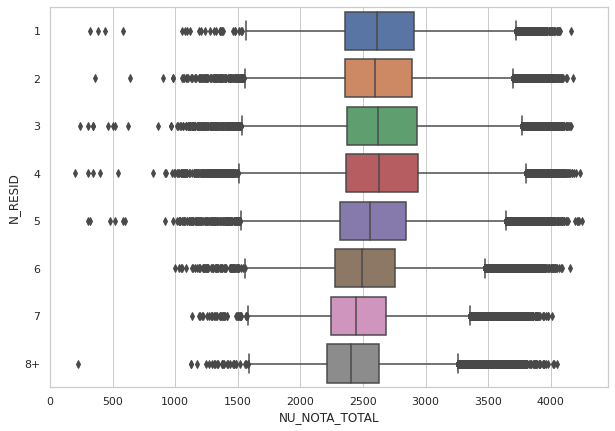

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x='NU_NOTA_TOTAL', y='N_RESID')

Os dados nos levam a concluir que estudantes residentes em domicílios com mais de 4 tendem a possuir desempenho pior. Esse desempenho reduz conforme aumenta o número de residentes.

## 3. 11. **Desempenho vs ano de conclusão do Ensino Médio**

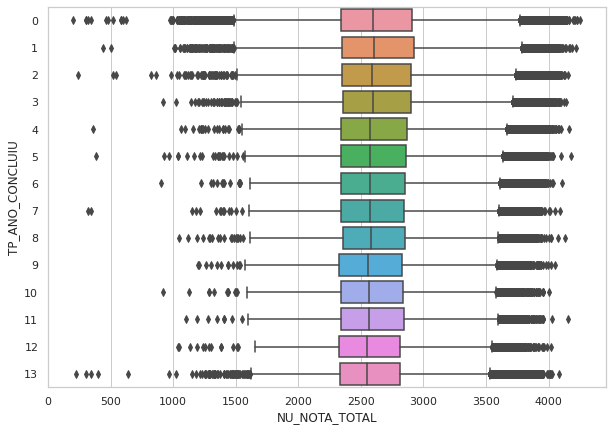

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='NU_NOTA_TOTAL', y='TP_ANO_CONCLUIU')

Aparentemente o ano de conclusão do ensino médio não afeta a nota obtida pelo participante.

## 3. 12. **Desempenho vs. estado de residência**

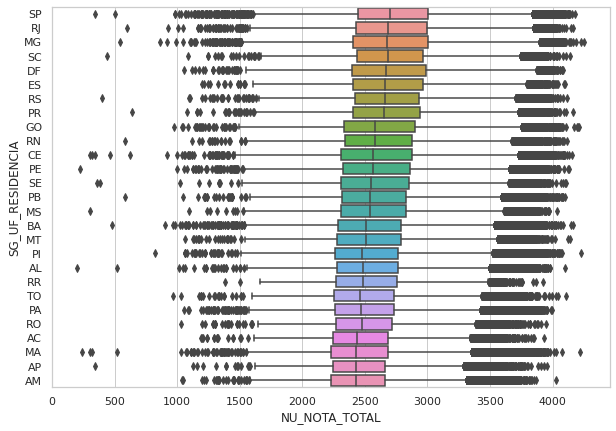

In [ ]:
plt.figure(figsize=(10, 7))
df_estado_residencia = df_original[['NU_NOTA_TOTAL','SG_UF_RESIDENCIA']].copy()
df_estado_residencia['NOTA_MEDIA_ESTADO'] = df_estado_residencia.groupby('SG_UF_RESIDENCIA')['NU_NOTA_TOTAL'].transform('mean')
df_estado_residencia.sort_values(by = 'NOTA_MEDIA_ESTADO', ascending = False, inplace=True)
sns.boxplot(data=df_estado_residencia, x='NU_NOTA_TOTAL', y='SG_UF_RESIDENCIA')

Podemos ver que os estados do Sudeste e Sul e o DF possuem os melhores desempenhos no Enem 2019.

# 4. **Modelo de regressão**



## 4. 1. **Selecionando as variáveis**

Vamos tentar montar um modelo de regressão, de forma a estimar a nota do candidato de acordo com as seguintes variáveis:
  
* NU_IDADE
* TP_SEXO
* TP_ESTADO_CIVIL
* TP_COR_RACA
* TP_ST_CONCLUSAO
* CO_UF_ESC
* TP_DEPENDENCIA_ADM_ESC
* TP_LOCALIZACAO_ESC
* EDU_PAI
* EDU_MAE
* OCUP_PAI
* OCUP_MAE
* N_RESID
* RENDA
* CELULAR
* COMPUTADOR
* INTERNET
* NU_NOTA_TOTAL

In [ ]:
features = [
            'NU_IDADE',
            'TP_SEXO',
            'TP_ESTADO_CIVIL',
            'TP_COR_RACA',
            'TP_ST_CONCLUSAO', 
            'CO_UF_ESC',
            'TP_DEPENDENCIA_ADM_ESC',
            'TP_LOCALIZACAO_ESC',
            'EDU_PAI', 
            'EDU_MAE',
            'OCUP_PAI',
            'OCUP_MAE', 
            'N_RESID', 
            'RENDA',
            'CELULAR',
            'COMPUTADOR', 
            'INTERNET',
            'NU_NOTA_TOTAL'
            ]            
df_regressao = df[features].copy()
df_regressao.head()

,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,EDU_PAI,EDU_MAE,OCUP_PAI,OCUP_MAE,N_RESID,RENDA,CELULAR,COMPUTADOR,INTERNET,NU_NOTA_TOTAL
3,25.0,F,1,1,1,NaN,NaN,NaN,C,E,B,D,4,E,D,B,B,2376.7
4,22.0,F,1,1,1,NaN,NaN,NaN,E,E,C,C,3,G,C,B,B,3196.8
5,37.0,M,2,2,1,NaN,NaN,NaN,B,B,C,B,7,E,E,B,B,3248.1
6,22.0,F,1,3,1,NaN,NaN,NaN,E,B,C,B,3,B,B,A,A,2674.9
9,17.0,M,1,1,2,NaN,NaN,NaN,E,E,B,B,5,F,C,B,B,2475.2


## 4. 2. **Removendo valores nulos**

Para podermos fazer um modelo de regressão linear, não podemos ter dados faltantes. Vamos tratar os casos nulos.

In [ ]:
df_regressao_not_null = df_regressao.dropna()
df_regressao_not_null.shape

(921299, 18)

## 4. 3. **Tratando variáveis categóricas**

Já temos nossas variáveis alvo. Entretanto, ainda precisamos tratar as variáveis categóricas, para que possam ser utilizadas corretamente.

In [ ]:
df_regressao_not_null = pd.get_dummies(df_regressao_not_null, drop_first=True)
df_regressao_not_null.head()

,NU_IDADE,NU_NOTA_TOTAL,TP_SEXO_M,TP_ESTADO_CIVIL_1,TP_ESTADO_CIVIL_2,TP_ESTADO_CIVIL_3,TP_ESTADO_CIVIL_4,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4,CO_UF_ESC_12.0,CO_UF_ESC_13.0,CO_UF_ESC_14.0,CO_UF_ESC_15.0,CO_UF_ESC_16.0,CO_UF_ESC_17.0,CO_UF_ESC_21.0,CO_UF_ESC_22.0,CO_UF_ESC_23.0,CO_UF_ESC_24.0,CO_UF_ESC_25.0,CO_UF_ESC_26.0,CO_UF_ESC_27.0,CO_UF_ESC_28.0,CO_UF_ESC_29.0,CO_UF_ESC_31.0,CO_UF_ESC_32.0,CO_UF_ESC_33.0,CO_UF_ESC_35.0,CO_UF_ESC_41.0,CO_UF_ESC_42.0,CO_UF_ESC_43.0,CO_UF_ESC_50.0,CO_UF_ESC_51.0,CO_UF_ESC_52.0,CO_UF_ESC_53.0,TP_DEPENDENCIA_ADM_ESC_2.0,TP_DEPENDENCIA_ADM_ESC_3.0,TP_DEPENDENCIA_ADM_ESC_4.0,TP_LOCALIZACAO_ESC_2.0,EDU_PAI_B,EDU_PAI_C,EDU_PAI_D,EDU_PAI_E,EDU_PAI_F,EDU_PAI_G,EDU_PAI_H,EDU_MAE_B,EDU_MAE_C,EDU_MAE_D,EDU_MAE_E,EDU_MAE_F,EDU_MAE_G,EDU_MAE_H,OCUP_PAI_B,OCUP_PAI_C,OCUP_PAI_D,OCUP_PAI_E,OCUP_PAI_F,OCUP_MAE_B,OCUP_MAE_C,OCUP_MAE_D,OCUP_MAE_E,OCUP_MAE_F,N_RESID_2,N_RESID_3,N_RESID_4,N_RESID_5,N_RESID_6,N_RESID_7,N_RESID_8+,RENDA_B,RENDA_C,RENDA_D,RENDA_E,RENDA_F,RENDA_G,RENDA_H,RENDA_I,RENDA_J,RENDA_K,RENDA_L,RENDA_M,RENDA_N,RENDA_O,RENDA_P,RENDA_Q,CELULAR_B,CELULAR_C,CELULAR_D,CELULAR_E,COMPUTADOR_B,COMPUTADOR_C,COMPUTADOR_D,COMPUTADOR_E,INTERNET_B
26,17.0,3612.9,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
28,18.0,2387.2,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
31,17.0,2493.8,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
34,17.0,3071.7,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
53,18.0,2111.4,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
df_regressao_not_null.shape

(921299, 101)

## 4. 4. **Separando a base em treinamento e teste**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
targets = df_regressao_not_null['NU_NOTA_TOTAL']
df_regressao_not_null.drop('NU_NOTA_TOTAL', axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_regressao_not_null, targets, train_size=0.8, random_state=27)

In [ ]:
print(X_train.shape, y_train.shape)

(737039, 100) (737039,)


In [ ]:
print(X_test.shape, y_test.shape)

(184260, 100) (184260,)


## 4. 5. **Treinando o modelo de Regressão Linear**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()

In [ ]:
# treinando o modelo de regressão linear
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# coeficiente de determinação
print(f'R² = {regressor.score(X_train, y_train)}')

R² = 0.4090093462584


## 4. 6. **Predizendo as notas para as amostras de teste**

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([2524.625, 2412.375, 2476.875, ..., 2380.375, 2738.625, 2390.875])

In [ ]:
resultados = pd.DataFrame({
    'PREDICAO': y_pred.round(2),
    'REAL': y_test.round(2),
    'ERRO_ABSOLUTO': abs(y_test - y_pred)
})
resultados

,PREDICAO,REAL,ERRO_ABSOLUTO
2479953,2524.62,2591.1,66.475
1959126,2412.38,1968.4,443.975
1949527,2476.88,2790.0,313.125
1783090,2506.62,3220.3,713.675
682405,2375.12,2259.6,115.525
...,...,...,...
1953365,2671.12,1996.8,674.325
277795,2632.88,2263.2,369.675
2332849,2380.38,2131.9,248.475
2505143,2738.62,2615.3,123.325


## 4. 7. **Usando Cross-Validation**

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
def perform_cv(X_train, y_train, n_folds):
  kf = KFold(n_splits=n_folds, random_state=27, shuffle=True)
  i = 0
  y_preds = []
  y_tests = []

  for index in kf.split(X_train):
    print(f'It[{i+1}]\n')
    X_train_cv, y_train_cv, X_test_cv, y_test_cv = X_train.iloc[index[0]], y_train.iloc[index[0]], X_train.iloc[index[1]], y_train.iloc[index[1]]

    # Trainando o modelo
    regressor_cv = LinearRegression()
    regressor_cv.fit(X_train_cv, y_train_cv)
    y_pred = regressor_cv.predict(X_test_cv)

    y_preds = np.append(y_preds, y_pred)
    y_tests = np.append(y_tests, y_test_cv)

    print(f'R² = {regressor_cv.score(X_train_cv, y_train_cv)}\n')

    i+=1
  return y_preds, y_tests

In [ ]:
y_pred_cv, y_test_cv = perform_cv(df_regressao_not_null, targets, 5)

It[1]

R² = 0.4090142522551189

It[2]

R² = 0.40806128600785474

It[3]

R² = 0.4092557593832197

It[4]

R² = 0.4094766047982168

It[5]

R² = 0.4090051282486413



In [ ]:
resultados_cv = pd.DataFrame({
    'PREDICAO': y_pred_cv.round(2),
    'REAL': y_test_cv.round(2),
    'ERRO_ABSOLUTO': abs(y_test_cv - y_pred_cv)
})
resultados_cv

,PREDICAO,REAL,ERRO_ABSOLUTO
0,2931.22,3612.9,681.681250
1,2514.48,2111.4,403.084375
2,2428.30,2392.5,35.796875
3,2571.00,2520.5,50.500000
4,2730.38,3382.9,652.525000
...,...,...,...
921294,2556.78,2388.9,167.881250
921295,2653.47,2179.9,473.568750
921296,2903.41,2720.7,182.706250
921297,2948.88,2798.9,149.975000


## 4. 8. **Medindo a acurácia das predições**

### 4. 8. 1. **Visualizando os erros**

In [ ]:
resultados['ERRO_ABSOLUTO'].describe()

count    184260.000000
mean        248.271659
std         186.386967
min           0.000000
25%         100.175000
50%         211.375000
75%         358.225000
max        1826.875000
Name: ERRO_ABSOLUTO, dtype: float64

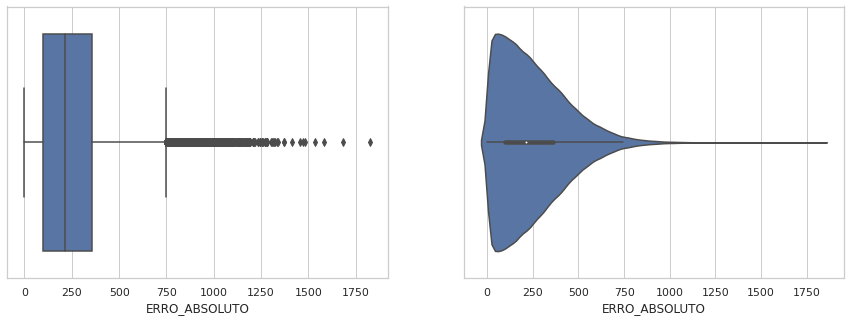

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax1 = sns.boxplot(data=resultados, x='ERRO_ABSOLUTO', ax=axes[0])
ax2 = sns.violinplot(data=resultados, x='ERRO_ABSOLUTO', ax=axes[1])

In [ ]:
resultados_cv['ERRO_ABSOLUTO'].describe()

count    921299.000000
mean        248.465635
std         186.603458
min           0.000000
25%         100.193750
50%         211.143750
75%         358.325000
max        2059.937500
Name: ERRO_ABSOLUTO, dtype: float64

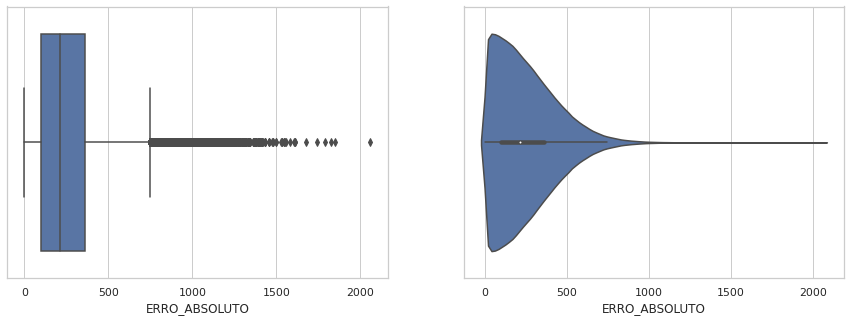

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax1 = sns.boxplot(data=resultados_cv, x='ERRO_ABSOLUTO', ax=axes[0])
ax2 = sns.violinplot(data=resultados_cv, x='ERRO_ABSOLUTO', ax=axes[1])

### 4. 8. 2. **Mean Absolute Error (MAE)**

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
MAE1 = mean_absolute_error(y_test, y_pred)
MAE2 = mean_absolute_error(y_test_cv, y_pred_cv)
print(f'MAE sem CV: {MAE1}')
print(f'MAE com CV: {MAE2}')

MAE sem CV: 248.2716589330294
MAE com CV: 248.46563516694576


### 4. 8. 3. **Mean Squared Error (MSE)**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE1 = mean_squared_error(y_test, y_pred)
MSE2 = mean_squared_error(y_test_cv, y_pred_cv)
print(f'MSE sem CV: {MSE1}')
print(f'MSE com CV: {MSE2}')

MSE sem CV: 96378.72968121471
MSE com CV: 96555.9847059853


### 4. 8. 4. **Root Mean Squared Error (RMSE)**

In [ ]:
RMSE1 = mean_squared_error(y_test, y_pred, squared=False)
RMSE2 = mean_squared_error(y_test_cv, y_pred_cv, squared=False)
print(f'RMSE sem CV: {RMSE1}')
print(f'RMSE com CV: {RMSE2}')

RMSE sem CV: 310.4492384935333
RMSE com CV: 310.73458884711454


# **Considerações Finais**

Os Microdados do ENEM e do IDD são o menor nível de desagregação de dados dos participantes disponível. Ao analisarmos essas bases, podemos observar que há muitas features que parecem ter influência sobre a nota final do participante. Tais relações têm origem na sociologia e são, de certa forma, esperadas. Por exemplo: maior renda familiar pode estar ligada a uma maior facilidade de acesso a educação de qualidade. Tais fenômenos podem ser estudados amplamente na disciplina de sociologia mas, no caso específico da análise exploratória de dados, foram muito úteis para entender como é a influência de cada feature na nota final do participante.

Com as análises obtidas, conseguimos gerar um modelo de regressão linear que estima com uma precisão bastante relevante. Considerando a nota total do participante de 0 a 5000, nosso modelo possui erro aproximado de 310 pontos, utilizando a medida RMSE. Podemos considerar que ele poderia ser utilizado em produção sem grandes prejuízos, para fazer estudos sociológicos.